In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Plot model heritability

In [67]:
icaList = [x.split('.')[0] for x in os.listdir('ICA/')]
dfica = pd.read_csv('ICA_RES.csv', index_col = 0)
dfica.columns = ['IC' + str(i) for i in list(dfica)]
dfica = dfica[icaList]
dfica

,IC8,IC114,IC58,IC118,IC102,IC26,IC153,IC59,IC34,IC157,...,IC109,IC44,IC147,IC63,IC27,IC61,IC75,IC3,IC46,IC110
GRMZM5G807592,1.841457,-0.065758,-6.529338,-0.190071,-0.150081,-0.099268,-0.509200,-1.494400,0.817340,0.270259,...,-0.292039,0.765220,0.835928,-1.115895,-0.439976,-0.936503,-0.346773,1.145251,1.395929,1.070215
GRMZM5G862955,0.732880,0.382241,-4.527813,1.383149,-1.313407,0.649416,-0.395783,-1.132725,-0.068259,0.441720,...,0.237049,0.021369,1.951116,-0.053461,-0.481090,-1.612351,0.799583,0.193762,1.488038,0.369839
GRMZM5G876913,1.738950,-0.393016,-13.453297,-0.794880,-0.852810,-0.692989,-0.838857,-0.683676,0.175254,0.331064,...,-0.421218,0.186093,0.971684,-1.608927,2.023103,-1.913029,0.616898,1.062938,1.076260,0.186737
GRMZM5G881135,1.713438,-0.458838,-13.376635,-0.803716,-0.861050,-0.749958,-0.843710,-0.791793,0.192448,0.249788,...,-0.475501,0.155912,1.013414,-1.528174,2.148033,-1.769411,0.620231,0.878384,1.107212,0.079489
GRMZM5G892769,0.040216,-0.300004,-4.983267,2.002764,-0.525760,0.380701,0.161002,-0.392829,0.185535,-0.170159,...,0.973822,0.866073,0.223161,0.664389,0.604617,-1.877346,1.019379,0.405931,0.960776,-1.651185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zma-MIR168b,-0.607012,-0.385209,1.405758,-0.932572,0.894377,0.282322,-0.537310,-0.549258,-0.379534,-1.590091,...,0.910392,-1.092910,0.424142,-1.119401,0.981393,1.827783,1.049347,-0.810557,1.264482,0.713850
zma-MIR171f,0.088925,2.297692,-0.325184,0.591320,-0.710177,0.532623,3.100426,0.337482,0.611679,1.555712,...,0.157202,0.814272,-1.468675,0.081250,0.321990,-0.952743,0.095469,0.277649,1.180976,0.497732
zma-MIR396a,0.274855,1.485817,-0.569414,-1.778263,-0.844893,-0.154845,-0.437779,0.434822,-0.220410,-2.611275,...,-1.512231,0.447697,-1.044621,1.595733,0.262240,0.728633,1.197725,0.383873,-0.742883,-0.546718
zma-MIR396d,-0.035577,-1.346745,2.585281,1.513887,2.427374,-0.049345,0.268806,-1.191851,0.011775,-0.704369,...,-0.577378,-0.473735,0.902123,0.004037,0.297965,-1.228632,-0.413714,-0.051123,-0.944017,0.451530


In [102]:
import subprocess as sp
gCount = []
for x in dfhb.index:
    fin = 'ICA_PC/PC{0}.list'.format(x[1:])
    if not os.path.exists(fin): 
        gCount.append(0)
        continue
    command = 'wc -l {0}'.format(fin)
    gNum = sp.check_output(command, shell=True).decode().split()[0]
    gCount.append(int(gNum))
dfhb['GeneNumber'] = gCount
dfhb

gCount =[]
for ica in dfhb.index:
    command = 'wc -l ICA/{0}.list'.format(ica)
    count = int(sp.check_output(command, shell=True).decode().split()[0])-1
    gCount.append(count)
dfhb = pd.read_csv('ModuleHeritability.csv', index_col = 0)
dfhb.index = [x.replace('V', 'IC') for x in dfhb.index]
dfhb = dfhb.loc[list(dfica)]
dfhb.sort_values(by = 'Heritability', inplace=True, ascending=False)
dfhb['moduleSize'] = gCount 
dfhb.to_csv('moduleHb_Size.csv')

In [47]:
dfhb = pd.read_csv('moduleHb_Size.csv', index_col = 0)
dfhb

,Heritability,moduleSize
IC157,0.974458,74
IC2,0.961791,97
IC153,0.953908,96
IC147,0.946697,89
IC43,0.913879,22
IC8,0.851392,40
IC59,0.822226,128
IC148,0.808857,220
IC63,0.700381,102
IC107,0.651284,69


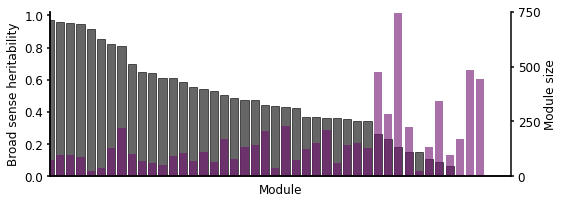

In [3]:
dfhb = pd.read_csv('moduleHb_Size.csv')
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.size'] = 12
fig = plt.figure(figsize=(8,3),tight_layout = True)

ax1 = fig.add_subplot(1,1,1)#, adjustable = 'box', aspect = 0.1)
ax2 = ax1.twinx()
#ax2 = fig.add_subplot(2,1,2)

plt.setp(ax1.spines.values(), linewidth=1.5)
plt.setp(ax2.spines.values(), linewidth=1.5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax2.spines['right'].set_visible(False)
ax1.tick_params(axis='y', which='major', labelsize=12,direction='out', length=3, width=1.5)
ax1.tick_params(axis='x', which='major', labelsize=12,direction='out', length=0, width=0)
ax2.tick_params(direction='out', length=3, width=1.5)

sns.barplot(x='Module', y='Heritability', data = dfhb, color = 'k', edgecolor = 'k', alpha = 0.6, ax = ax1)
sns.barplot(x='Module', y='moduleSize', data = dfhb, color = 'purple', alpha=0.6, ax = ax2 )
#ax2.bar(xpos, dfhb.moduleSize, color = 'k', alpha = 0.6)
ax2.set_ylim(0,750)
#ax2.set_xlim(0,43)
ax2.set_yticks([0,250,500,750])
ax2.set_ylabel('Module size')

xpos = list(range(1,len(dfhb)+1))
#ax1.bar(xpos, dfhb.Heritability, color = 'purple', edgecolor = 'k', alpha=0.6, width = 1)
ax1.set_xlim(0,45)
ax1.set_ylabel('Broad sense heritability')
ax1.set_xlabel('Module')
ax1.set_xticklabels([])
#ax2.set_aspect(0.5, adjustable='box')
plt.savefig('ModelHeritability.svg')
plt.savefig('ModelHeritability.png', dpi = 500)

Text(0, 0.5, 'Heritability')

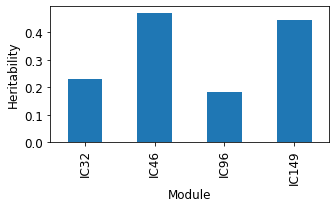

In [11]:
sigIC = ['IC32','IC46','IC96','IC149']
dfhb.set_index('Module').loc[sigIC,'Heritability'].plot(kind = 'bar', figsize=(5,2.5))
plt.ylabel('Heritability')

In [142]:
dftas.rs.to_csv('sigSite_rs.list', header = None, index=False)

In [112]:
dfsnp = pd.read_csv('sigGWAS_RES/V1_transformed.assoc.txt', sep = '\t', usecols = ['chr','rs','ps'], index_col = 'rs')
dfsnp.head()

dftas = pd.read_csv('sigGWAS_RES/consolidatedPeaks_peaks.txt')
dftas

sigList = dftas.rs.unique()
sList = []

dfsig = dfsnp.loc[sigList]
dfsig.to_csv('sigSites.list', sep = '\t', index=False)
for asit in sigList:
    print(asit)
    ssList = []
    sChr = dfsnp.loc[asit]['chr']
    sPos = dfsnp.loc[asit]['ps']
    sst = sPos - 1000000
    ssd = sPos + 1000000 
    df = dfsnp.loc[dfsnp['chr'] == sChr] 
    df = df.loc[df['ps'] >= sst]
    df = df.loc[df['ps'] <= ssd]
    ssList = list(df.index)
    sList += ssList 

sList = list(set(sList))
sList.sort()
print(len(sList))

fout = open('Allsites.list','w')
for x in sList:
    fout.write(x + '\n')
    
fout.close()
#vcftools --gzvcf /home/gsun2unl/Documents/ePscoR_Schnablelab/Phenotype/GEMMA/e340.vcf.gz --snps Allsites.list --recode --stdout | bgzip -c > AllSites.vcf.gz
#vcftools --gzvcf AllSites.vcf.gz --geno-r2-positions sigSites.list --out AllSiteLD

1-2334921
1-5250235
1-9419082
1-29680870
1-49359581
1-90370689
1-105815633
1-108513119
1-151920590
1-161943921
1-168224151
1-188124404
1-203909474
1-208996484
1-209297254
1-228713134
1-235479721
1-237846791
1-241486584
1-243047904
1-243062001
1-276051813
1-292416501
2-3778376
2-4855287
2-12003081
2-27349150
2-99506148
2-104388040
2-110181977
2-154859825
2-179934484
2-205736349
2-227434727
2-228737881
2-234901962
3-4546443
3-6949184
3-18837352
3-35965822
3-42705036
3-43086570
3-43114322
3-43363238
3-46963603
3-47865865
3-60561126
3-66380744
3-86358542
3-85756002
3-117241157
3-139530446
3-146822830
3-161677749
3-175307820
3-175749099
3-194058000
3-194566797
3-205764505
3-209194147
3-210067291
3-211981097
3-212334423
3-222887144
3-225832987
3-225914977
3-228170272
3-231215752
4-4758711
4-6624829
4-10910510
4-13410588
4-26523163
4-29638622
4-31103617
4-33559887
4-33615523
4-38262769
4-44212699
4-60017523
4-71066039
4-76234357
4-124973335
4-131918946
4-146170385
4-152298678
4-156247115
4-16

In [182]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [183]:
np.arange(100, 320, 5)

array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225,
       230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290,
       295, 300, 305, 310, 315])

In [188]:
import random
l1 = [1,3,5,6]
random.choice(l1)

5

In [64]:
dftas = pd.read_csv('sigGWAS_RES/consolidatedPeaks_peaks.txt')
dftas_peak = pd.DataFrame()
for afile in os.listdir('ICA_GWAS_Signal/'):
    if afile.endswith('.summary.csv'):
        IC = afile.split('.')[0]
        dfsignal = pd.read_csv('ICA_GWAS_Signal/{0}_GWAS_signal.csv'.format(IC))
        dfpeak = pd.read_csv('ICA_GWAS_Signal/{0}'.format(afile), index_col = 'peaks')
        dfpeak = dfpeak.loc[dfpeak['SnpNumer'] >=3]
        for apeak in dfpeak.index:
            pChr = dfpeak.loc[apeak,'chr']
            pST = dfpeak.loc[apeak,'pStart']
            pED = dfpeak.loc[apeak, 'pStop']
            dfsig = dfsignal.loc[dfsignal.chr == pChr]
            dfsig = dfsig.loc[(dfsig.ps >= pST) & (dfsig.ps <= pED)]
            dfsig['IC'] = IC
            dfsig['Peak'] = apeak
            dftas_peak = dftas_peak.append(dfsig)
dftas_peak.iloc[:, 1:].to_csv('GoodPeakSummary.csv')
dftas_peak.rs.to_csv('TAS_In_GoodPeaks.list', header = None, index = False)

In [68]:
dftas_filt = pd.DataFrame()
for trait, grp in dftas.groupby('trait'):
    if len(grp) > 10: continue
    #grp = grp.sort_values(by='logPvalue')[:3]
    dftas_filt = dftas_filt.append(grp) #print(grp)
dftas_filt.to_csv('ICA_Peak_consolidated_filtered.csv', index = False)
dftas_filt

,chr,rs,ps,p_lrt,logPvalue,peaks,SnpNumer,pStart,pStop,pLength,trait
57,3,3-194566797,197480083,1.182961e-10,9.927030,193,8,197449456,197540202,90746,IC114
2,1,1-9419082,9479016,9.385598e-11,10.027538,3,7,9454128,9479566,25438,IC126
51,3,3-139530446,140247278,6.948715e-11,10.158096,176,11,140192688,140247278,54590,IC126
55,3,3-175749099,178250438,5.156930e-11,10.287609,187,8,178249672,178250438,766,IC126
82,4,4-124973335,127911630,1.907574e-10,9.719519,252,16,127122824,128413964,1291140,IC126
83,4,4-131918946,134938052,6.186047e-12,11.208587,254,22,134878541,135158803,280262,IC126
156,9,9-104178076,106735723,1.721331e-10,9.764136,511,7,106735723,106863961,128238,IC126
160,9,9-135721152,137993638,2.808970e-10,9.551453,524,23,137984949,138001859,16910,IC126
27,2,2-99506148,101714486,1.491958e-10,9.826243,110,48,101561619,103163770,1602151,IC128
102,5,5-174043711,178077566,1.107109e-09,8.955810,321,5,178038445,178077566,39121,IC128


In [79]:
dftas_peak = pd.read_csv('GoodPeakSummary.csv', index_col = ( -2,-1))
dftas_peak

Unnamed: 0  chr          rs        ps         p_lrt     IC
IC    Peak                                                            
IC34  4              4    2   2-3778376   3796207  3.159272e-10   IC34
      4              5    2   2-3778899   3796730  3.159272e-10   IC34
      4              6    2   2-3779210   3797041  3.159272e-10   IC34
      4              7    2   2-3779859   3797690  3.159272e-10   IC34
      4              8    2   2-3784840   3802671  1.753167e-09   IC34
...                ...  ...         ...       ...           ...    ...
IC130 5             12    9  9-70989366  59932219  2.846767e-09  IC130
      5             13    9  9-70980857  59940728  1.580684e-09  IC130
      5             14    9  9-70727219  60194178  3.237222e-09  IC130
      5             15    9  9-70727147  60194250  3.450395e-09  IC130
      5             16    9  9-70699036  60222356  7.660352e-10  IC130

[4032 rows x 6 columns]

In [75]:
dfetas.head()

,gene,beta,t-stat,p-value,FDR,type
SNP,,,,,,
3-211964777,Zm00001d043971,-0.628714,-4.861638,0.000002,0.127227,cis
3-211981097,Zm00001d043971,-0.602582,-4.480516,0.000010,0.271050,cis
3-211961554,Zm00001d043971,-0.579451,-4.454684,0.000011,0.271050,cis
3-211952538,Zm00001d043971,-0.535834,-4.198901,0.000034,0.609907,cis
3-211961175,Zm00001d043971,-0.529225,-4.086887,0.000055,0.776428,cis


In [84]:
dfetas = pd.read_csv('TAS_Trans.out',sep = '\t', index_col = 0)
dfetas['logP'] = -np.log(dfetas['p-value'])
dfetas.head()

,gene,beta,t-stat,p-value,FDR,logP
SNP,,,,,,
3-211964777,Zm00001d043971,-0.628714,-4.861638,1.797322e-06,0.127227,13.229213
8-101283658,Zm00001d021243,-1.178358,-6.671460,1.057085e-10,0.007618,22.970336
3-43064605,Zm00001d013863,0.209460,5.506424,7.329796e-08,0.514328,16.428733
3-43064965,Zm00001d013863,0.209460,5.506424,7.329796e-08,0.514328,16.428733
10-53838037,Zm00001d032521,-2.054006,-5.415358,1.173663e-07,0.514328,15.957966


In [87]:
from scipy.stats import fisher_exact,chi2_contingency
import pandas as pd
dftas_peak = pd.read_csv('GoodPeakSummary.csv', index_col = 'IC')
ICList = dftas_peak.index.unique()
dfetas = pd.read_csv('TAS_Trans.out',sep = '\t', index_col = 0)
dfetas['logP'] = -np.log(dfetas['p-value'])
#dfetas = dfetas.loc[dfetas['logP']>=5]
nameIC, pVal, pNum = [], [], []
fpout = open('eTraits_peaks_enrichement.txt','w')
headList = ['leadSNP', 'eTraitNumber','ModuleSize', 'EnrichmentFactor' ,'chi2_Pval', 'IC', 'Peak']
fpout.write('\t'.join(headList) + '\n')
for IC in ICList:
    print(IC)
    dfTAS_IC = dftas_peak.loc[IC]
    IC_Gene = open('ICA/{0}.list'.format(IC)).readlines()[1:]
    IC_Gene = [agene.strip() for agene in IC_Gene]
    dfTAS_IC.set_index('Peak', inplace=True)
    for apeak in dfTAS_IC.index.unique():
        #print('testing:', IC, apeak)
        dfTAS_IC_Peak = dfTAS_IC.loc[apeak].sort_values(by='logPvalue')
        #print(dfTAS_IC_Peak)
        peakSNP = dfTAS_IC_Peak['rs']
        leadSNP = map(str,list(dfTAS_IC_Peak.iloc[0,[1,3]].values))
        leadSNP = ':'.join(leadSNP)
        #print(leadSNP)#peakSNP[0].loc[apeak].
        rsList = [rs for rs in peakSNP if rs in dfetas.index]
        if len(rsList) == 0:continue
        print(rsList)
        dfrs = dfetas.loc[set(rsList)].reset_index().set_index('gene')
        #dfrs = dfrs.loc[dfrs['logP']>=5]
        meGene = [agene for agene in dfrs.index if agene in IC_Gene]
        print(meGene)
        meGene = list(set(meGene))
        me = len(meGene) 
        mne = len(IC_Gene) - me
        nme = len(dfrs.index.unique()) - me
        nmne = 19585 - len(IC_Gene) - nme
        #print(me, mne, nme, nmne)
        chi2, newp, dof, ex = chi2_contingency([[me,mne],[nme, nmne]])
        if newp <= (0.01/len(dfTAS_IC.index)): 
            em = me/len(IC_Gene)
            eb = len(dfrs.index.unique())/19565
            enrichment = em/eb
            if enrichment > 1:
                leadSNP = leadSNP + '(' + IC+ ')'
                peakName = 'Peak'+str(apeak)
                nameIC.append(leadSNP)
                pVal.append(newp)
                pNum.append(me)
                print('etrait enriched in ', leadSNP + '(' + IC+ ')' , 'Peak'+str(apeak))
                print(len(IC_Gene), 'module genes; ', me, 'etraits in module gene',  )
                #fout = open(IC + '_peak'+str(apeak)+'_gene.txt','w')
                lineList = [leadSNP, str(me), str(len(IC_Gene)), str(enrichment), str(newp), IC, str(apeak)]
                fpout.write('\t'.join(lineList) + '\n')
                #for agene in meGene:
                #    fout.write(agene + '\n')
                #fout.close()
fpout.close()               

IC34
['3-224223145', '3-224223188', '3-224221745', '3-224221835', '3-224222891', '3-224223181']
[]
IC21
IC75
IC102
['2-4675689', '2-4675688']
[]
['2-27094597']
[]
['2-228737212', '2-228737407', '2-228737426', '2-228737436']
[]
['3-43114394', '3-43114816', '3-43114820']
[]
['3-113334035']
[]
['3-206636755', '3-205699748', '3-206295882', '3-205697023']
[]
['3-213362769', '3-213332777', '3-213143996', '3-211980924', '3-211964777', '3-211961554', '3-211820335', '3-211820301']
[]
['3-225913483', '3-225913502', '3-225914977']
[]
['4-33260222', '4-33633638']
[]
['4-59119163']
[]
['4-146164672', '4-146164568', '4-146168835', '4-146170385']
[]
['4-169365613', '4-169277929']
[]
['4-195425907']
[]
['4-235093323', '4-235102315']
[]
['7-30030069', '7-30090928']
[]
['7-41220294']
[]
['8-8612524']
[]
['8-34484998']
[]
['8-101218024', '8-101218027', '8-101283658', '8-101218201', '8-100969946', '8-101140679', '8-101143770']
[]
['8-106896734', '8-105416456', '8-105416455', '8-107522779', '8-105373306', 

In [89]:
dfetrait_peak

,leadSNP,eTraitNumber,ModuleSize,EnrichmentFactor,chi2_Pval,IC,Peak
0,1:111188891(IC46),10,144,4.104775,4.534565e-06,IC46,1
1,3:42334086(IC149),26,207,2.383550,4.895733e-06,IC149,5
2,4:79115907(IC32),58,283,1.671441,3.039517e-05,IC32,12
3,1:280872052(IC96),45,743,1.877907,1.328740e-05,IC96,14
4,3:163218947(IC96),23,743,3.383497,6.645471e-10,IC96,24
5,4:242527467(IC96),30,743,2.212810,8.146261e-06,IC96,42
6,10:34688181(IC96),145,743,2.666343,2.179778e-38,IC96,72


0 0.2 4.5e-06
1 0.2 4.8e-06
2 0.2 3.0e-05
3 0.2 1.3e-05
4 0.2 6.6e-10
5 0.2 8.1e-06
6 0.2 2.1e-38


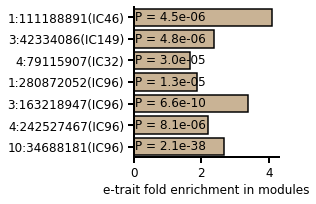

In [88]:
dfetrait_peak = pd.read_csv('eTraits_peaks_enrichement.txt',sep = '\t' )
fig, ax = plt.subplots(figsize=(4.5,3), tight_layout=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12,direction='out', length=6, width=2)
plt.setp(ax.spines.values(), linewidth=2)
xpos = list(range(1,len(dfetrait_peak)+1))
#ax.bar(xpos, pNum, color = 'tan', edgecolor = 'k', linewidth = '1.5')
#ax.set_xticks(xpos)
#
sns.barplot(y = 'leadSNP', x = 'EnrichmentFactor', data = dfetrait_peak, orient = 'h',
            color = 'tan',edgecolor = 'k', linewidth = '1.5', ax=ax)

ax.set_yticklabels(dfetrait_peak.leadSNP)

for x, leadSNP in enumerate(dfetrait_peak.index):
    h = 0.2 #dfetrait_peak.loc[leadSNP,'EnrichmentFactor'] +1
    pval = dfetrait_peak.loc[leadSNP,'chi2_Pval']
    if 'e' in str(pval):
        pval = str(pval).split('e')[0][:3] + 'e' + str(pval).split('e')[1]
    else: 
        pval = str(pval)[:7]
    text = 'P = {0}'.format(pval)
    print(x, h, pval)
    ax.annotate(text, (1.1, x+0.15), rotation=0, ha = 'center')
    
ax.set_ylabel('')
ax.set_xlabel('e-trait fold enrichment in modules')
plt.savefig('eTraitEnrichmentInModules.svg')

In [ ]:
for i, leadSNP in enumerate(dfetrait_peak.index):
    x = xpos[i]
    h = dfetrait_peak.loc[leadSNP,'eTraitNumber']
    pval = dfetrait_peak.loc[leadSNP,'chi2_Pval']
    ax.bar(x,h,color ='tan', edgecolor = 'k', linewidth = 1.5)
    if 'e' in str(pval):
        pval = str(pval).split('e')[0][:3] + 'e' + str(pval).split('e')[1]
    else: 
        pval = str(pval)[:7]
    text = 'P = {0}'.format(pval)
    print(x, h, pval)
    ax.annotate(text, (x, h+5), rotation=90, ha = 'center')

Ic7.csv
ic153.csv
ic149.csv
ic96.csv
ic32.csv
ic102.csv
ic110.csv
ic76_MF.csv


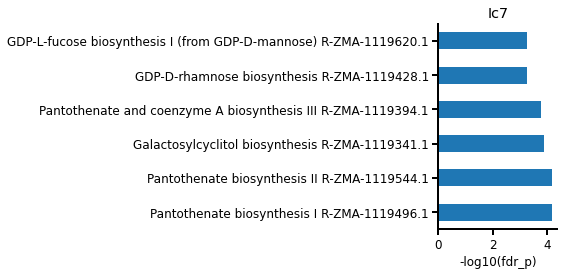

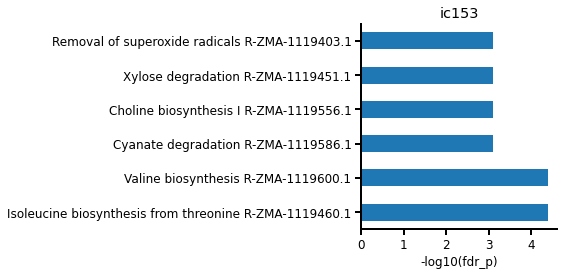

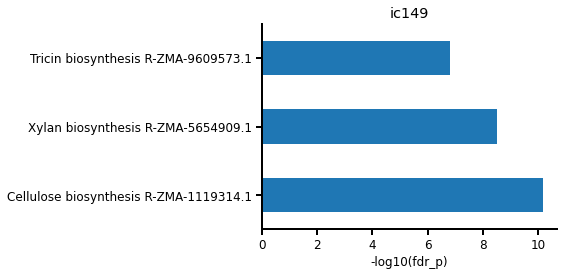

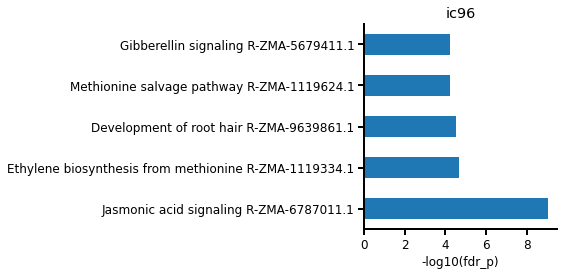

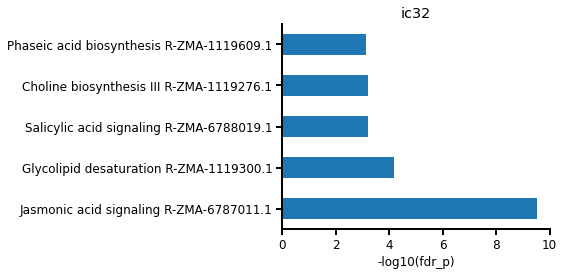

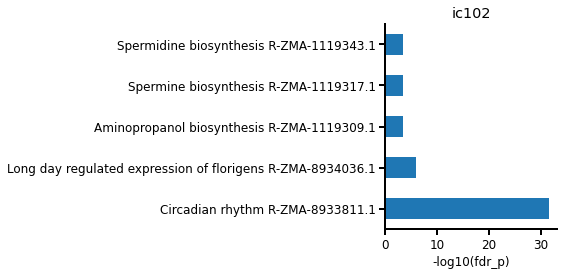

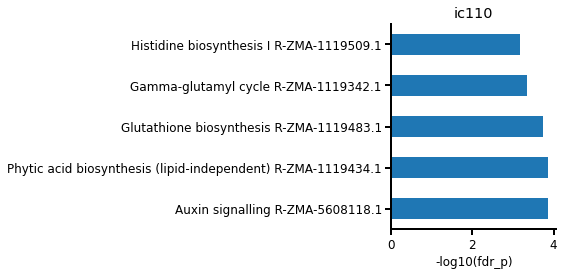

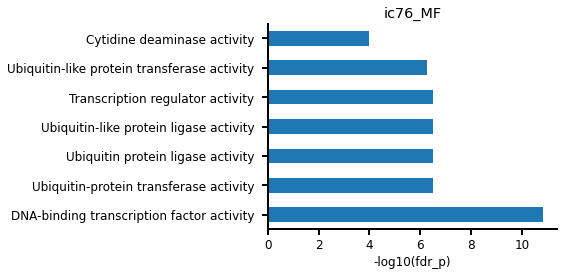

In [155]:
for afile in os.listdir('ClusterReactome/'):
    print(afile)
    fig, ax = plt.subplots(figsize=(8,4), tight_layout=True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=12,direction='out', length=6, width=2)
    plt.setp(ax.spines.values(), linewidth=2)

    df = pd.read_csv('ClusterReactome/' + afile)
    df['logP'] = -np.log(df['Enrichment FDR'])
    ax = df.logP.plot(kind = 'barh')
    ax.set_yticklabels(df['Functional Category'])
    ax.set_title(afile.split('.')[0])
    ax.set_xlabel('-log10(fdr_p)')
    plt.savefig(afile.replace('.csv','.png'),dpi=300)

In [154]:
12191984-11947301

244683

In [93]:
dfexp = pd.read_csv('eGWAS340_RepMerged_bcTransformed_fpkm.csv',sep = '\t', index_col = 0)
dfexp.head()

,1,10,100,101,102,103,104,105-1,105-2,106,...,N8,N81,N82,N84-1,N84-2,N88,N9,N94,N96,N99-2
GRMZM5G807592,1.014132,0.498216,-0.097451,2.122406,0.796234,1.088862,1.131386,0.360923,0.480245,0.294874,...,0.556549,-0.866325,0.900732,-0.110477,1.055954,0.864471,1.136457,0.320154,1.423330,1.091770
GRMZM5G862955,1.587817,1.186813,0.720201,2.172441,1.596640,1.653051,1.576765,1.547004,1.342609,1.284877,...,0.897442,1.057920,1.596746,0.528106,1.388438,1.203864,1.952560,1.718742,2.152483,1.918973
GRMZM5G876913,0.663754,0.551356,1.148384,1.557622,1.253073,1.066160,1.003663,1.227583,0.605248,1.407766,...,0.902638,1.139206,0.970717,0.180129,0.471269,0.929040,1.380261,0.468396,1.167979,0.473081
GRMZM5G881135,0.933262,0.772524,2.011343,2.332188,2.582410,1.697872,1.679187,1.444651,1.123917,2.381442,...,1.707891,2.002127,1.746062,0.354697,0.924836,1.554487,2.416729,0.915836,2.002412,0.144533
GRMZM5G892769,0.777896,0.227511,-0.175453,1.440155,0.900498,1.021679,0.872361,1.377226,0.488148,0.700441,...,0.263747,1.135987,0.680808,0.162640,-0.248081,0.778701,1.409403,1.127307,1.070980,1.432548


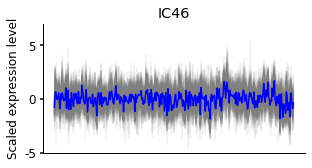

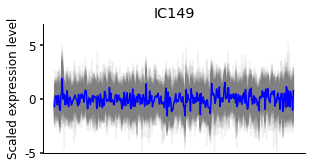

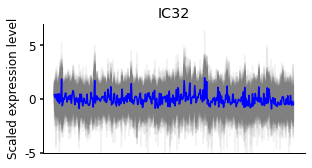

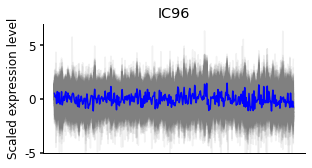

In [160]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.size'] = 12

plt.setp(ax.spines.values(), linewidth=2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12,direction='out', length=3, width=1.5)

dfetrait_peak = pd.read_csv('eTraits_peaks_enrichement.txt',sep = '\t' )

for IC in dfetrait_peak.IC.unique():
    IC_Gene = open('ICA/{0}.list'.format(IC)).readlines()[1:]
    IC_Gene = [agene.strip() for agene in IC_Gene]
    dfexpIC = dfexp.loc[IC_Gene]
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(dfexpIC.transpose().to_numpy())
    df_scaled = pd.DataFrame(df_scaled, columns=dfexpIC.index)
    gMean = df_scaled.mean(axis=1)
    fig, ax = plt.subplots(figsize=(4.5,2.5),tight_layout=True)  
    plt.setp(ax.spines.values(), linewidth=1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='y', which='major',direction='out', length=3, width=1.5)
    ax.tick_params(axis='x', which='major',direction='out', length=0, width=0)
    ax.plot(df_scaled, c = 'grey', alpha = 0.1, rasterized=True)
    ax.plot(gMean, c='blue', linewidth=1.5, label = 'Average level')
    ax.set_xticklabels([])
    ax.set_ylim(-2,7)
    ax.set_yticks([-5, 0, 5])
    ax.set_yticklabels(['-5', '0','5'])
    ax.set_ylabel('Scaled expression level')
    #ax.legend()
    ax.set_title(IC)
    fig.savefig(IC+'_expression.svg')
    fig.savefig(IC+'_expression.png',dpi=500)

In [ ]:
look at the genes inovolved in many clusters. 


In [144]:
1028+1028+1285+1028+1285+1028+1068

7750

IC34
IC21
IC75
IC102
IC19
IC126
IC87
IC5
IC58
IC46
IC139
IC157
IC128
IC153
IC149
IC32
IC7
IC114
IC76
IC110
IC63
IC96
IC148
IC130


<ipython-input-121-2c5f3c94d967>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,4))
<ipython-input-121-2c5f3c94d967>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,4))
<ipython-input-121-2c5f3c94d967>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  

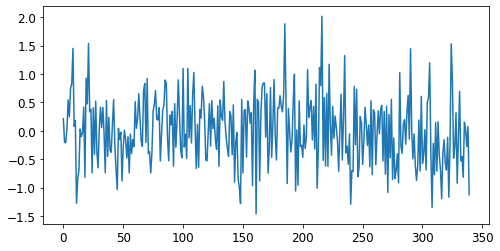

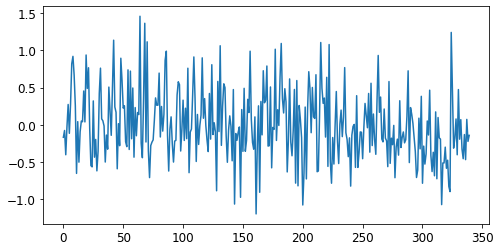

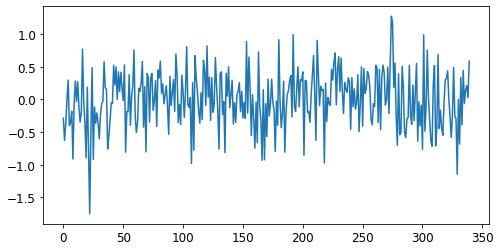

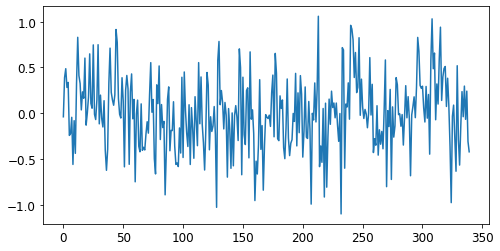

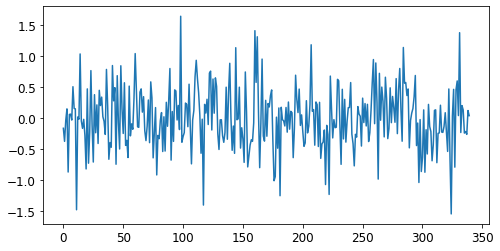

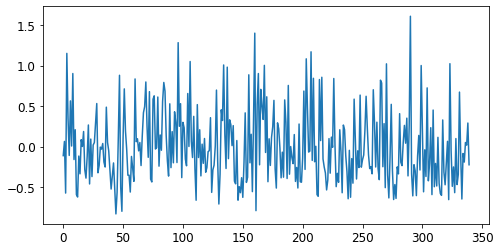

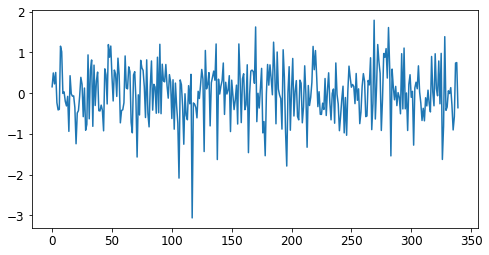

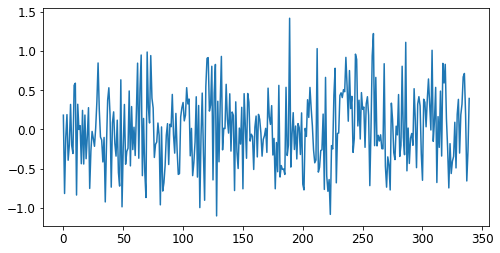

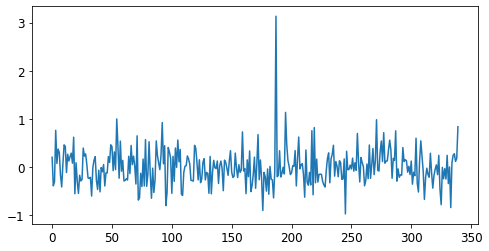

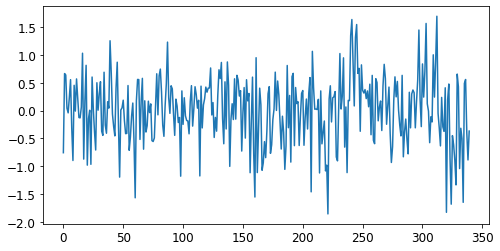

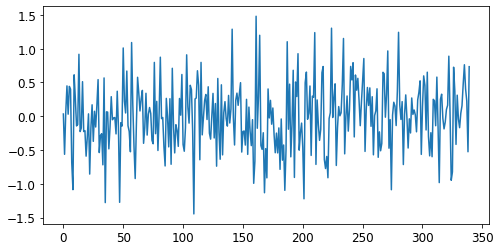

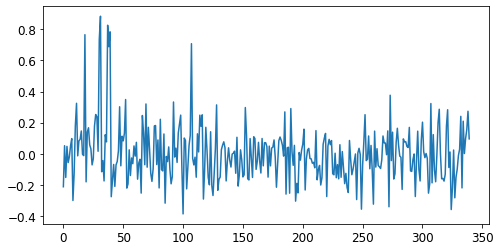

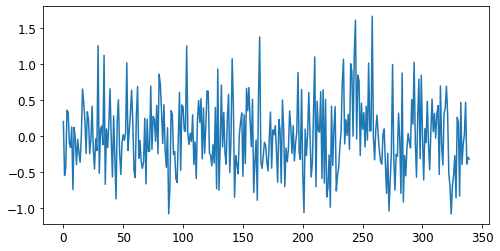

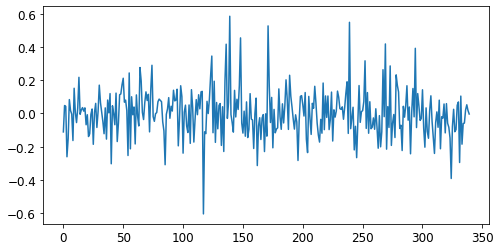

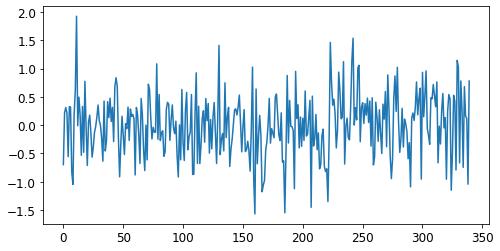

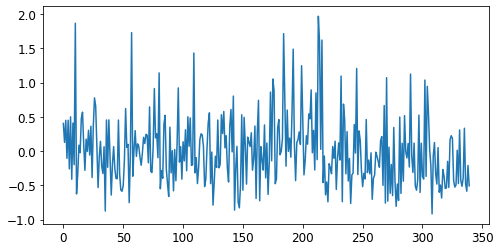

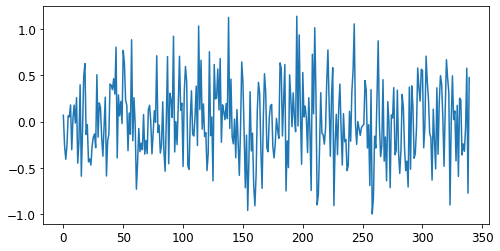

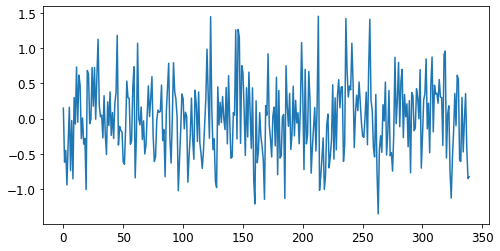

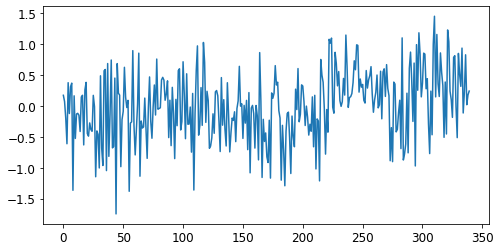

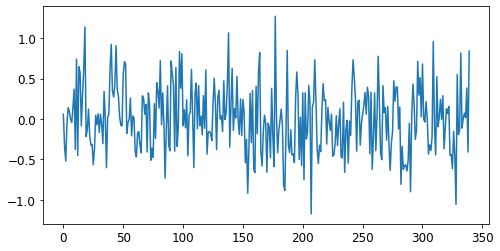

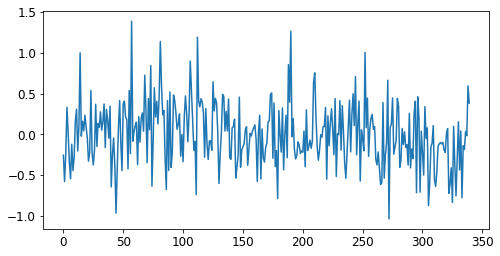

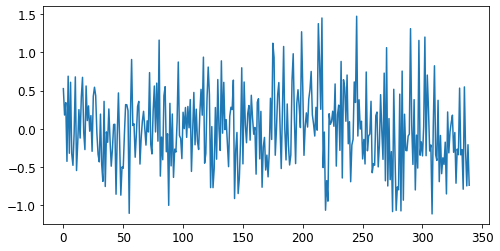

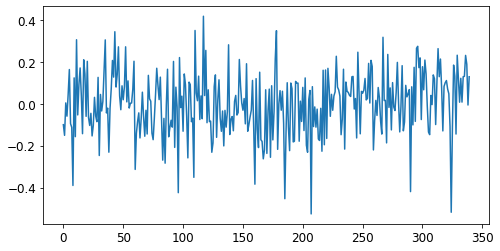

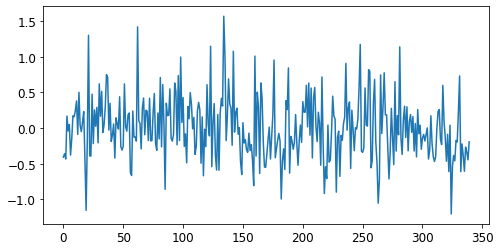

In [121]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
df
for IC in ICList:
    print(IC)
    IC_Gene = open('ICA/{0}.list'.format(IC)).readlines()[1:]
    IC_Gene = [agene.strip() for agene in IC_Gene]
    dfexpIC = dfexp.loc[IC_Gene]
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(dfexpIC.transpose().to_numpy())
    df_scaled = pd.DataFrame(df_scaled, columns=dfexpIC.index)
    gMean = df_scaled.mean(axis=1)
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(gMean)

In [106]:
dfexpIC = dfexp.loc[IC_Gene]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfexpIC.transpose().to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dfexpIC.index)
gMean = df_scaled.mean(axis=1)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(gMean)

,1,10,100,101,102,103,104,105-1,105-2,106,...,N8,N81,N82,N84-1,N84-2,N88,N9,N94,N96,N99-2
Zm00001d000986,5.598699,5.013298,6.543803,2.913001,4.612610,7.008434,5.327686,2.998504,5.348385,5.057375,...,6.995186,7.352829,5.618834,4.747385,4.796621,3.247703,6.417143,4.776110,3.634576,7.646430
Zm00001d001788,6.125968,6.469433,7.175985,6.279252,6.198273,6.452638,5.525491,6.867930,6.972956,6.864462,...,6.632565,7.060462,6.128387,6.706622,4.408697,5.334652,6.899915,6.956392,5.837888,6.012616
Zm00001d001999,3.134886,3.104415,3.215269,3.210207,3.152534,3.120426,3.302639,3.031744,3.316559,3.198584,...,3.110101,3.327836,3.200947,2.972692,3.432840,3.087932,3.175447,2.959858,3.188517,3.323902
Zm00001d002739,1.266522,1.254397,1.311245,1.343963,1.275515,1.409875,1.435302,1.352979,1.444688,1.341557,...,1.287276,1.403668,1.174767,1.188953,1.365350,1.173902,1.277904,1.317395,1.349103,1.346582
Zm00001d003248,3.351687,6.137001,3.753788,5.747158,5.893490,4.999572,8.399050,4.302788,9.584853,5.294845,...,6.048518,7.296006,3.821336,2.416805,7.649019,4.248810,5.023596,5.151500,6.357206,6.326243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d053189,7.749186,7.409224,7.710850,12.788663,9.964772,8.503448,8.768166,8.623390,11.326503,7.814299,...,10.005380,8.950917,8.052995,6.245784,9.600762,7.365758,8.535575,8.893920,8.154486,7.810688
Zm00001d053247,1.640025,1.901455,1.452283,2.242868,1.752003,1.933707,1.823795,1.862539,3.065369,1.616973,...,1.650263,2.334588,1.367631,1.302812,1.912863,1.121388,1.519175,2.023446,1.778898,2.448856
Zm00001d053626,3.926417,1.970316,2.063900,2.533134,1.124407,1.378581,-0.097120,2.097022,1.814783,2.402232,...,1.727010,3.018376,0.384851,1.536934,2.083042,0.722528,1.612851,0.970460,0.782348,2.414760
Zm00001d053964,3.266241,3.071935,3.180644,3.196182,3.553452,3.339419,3.350382,3.089503,3.599451,3.669488,...,3.365082,3.574053,3.155563,3.351493,3.238596,3.249077,2.921225,3.179789,3.387753,3.323760


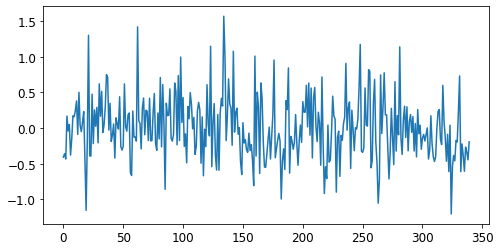

In [120]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfexpIC.transpose().to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dfexpIC.index)
gMean = df_scaled.mean(axis=1)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(gMean)

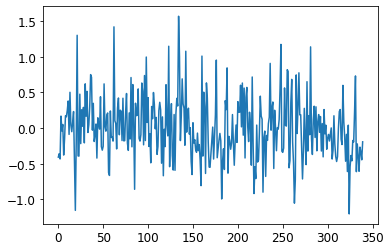

In [115]:
gMean = []
for x in df_scaled.index:
    gMean.append(df_scaled.loc[x].mean())
plt.plot(gMean)

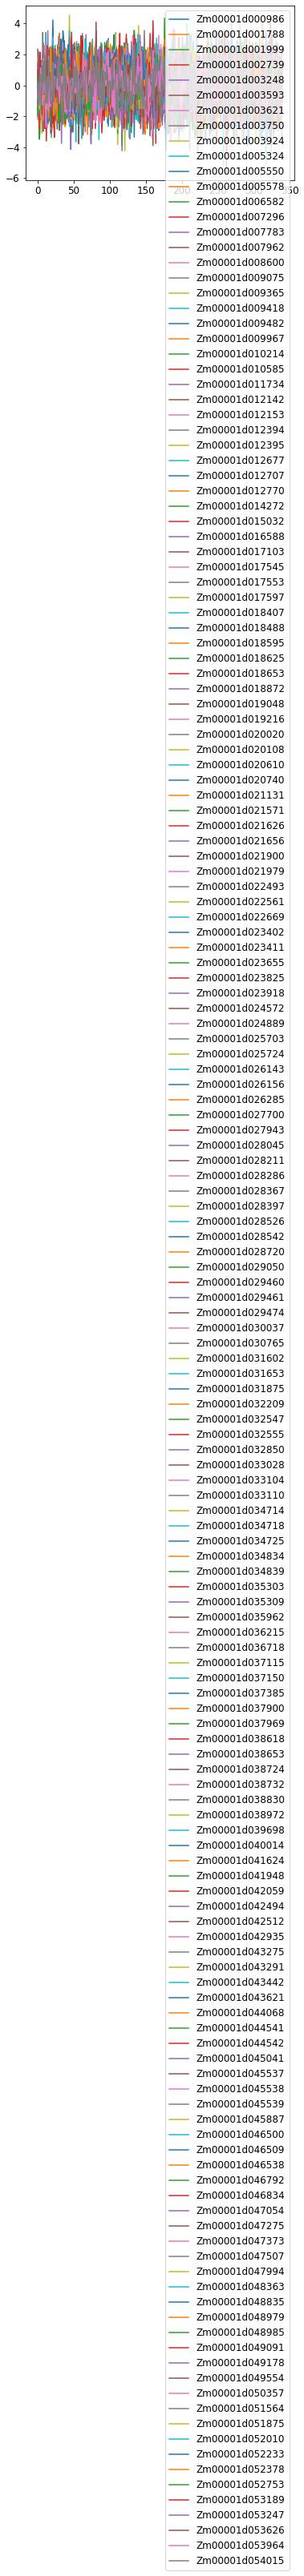

In [114]:
df_scaled.plot()

In [187]:
dftas

,chr,rs,ps,p_lrt,logPvalue,peaks,SnpNumer,pStart,pStop,pLength,trait
0,1,1-2334921,2484620,2.969174e-10,9.527364,1,24,2482447,2561962,79515,IC19
1,1,1-5250235,5340279,8.674890e-10,9.061736,2,5,5337324,5340279,2955,IC87
2,1,1-9419082,9479016,9.385598e-11,10.027538,3,7,9454128,9479566,25438,IC126
3,1,1-29680870,29954377,2.244452e-09,8.648890,10,5,29954377,29954692,315,IC21
4,1,1-49359581,49773713,7.701516e-11,10.113424,18,5,49448593,49773713,325120,IC153
...,...,...,...,...,...,...,...,...,...,...,...
168,10,10-53838037,54640030,2.026227e-10,9.693312,547,8,54450301,55192204,741903,IC5
169,10,10-69196672,68423106,5.964436e-14,13.224431,549,7,67501630,68718330,1216700,IC102
170,10,10-87111723,87226335,3.651251e-09,8.437558,556,9,87226335,87226986,651,IC110
171,10,10-133738317,134965116,3.556943e-11,10.448923,572,5,134964909,135300562,335653,IC7


In [2]:
dffunc = pd.read_csv('B73v4.gene_function.txt',sep = '\t', index_col = 0)
fDict = {}
ICList = []
for afile in os.listdir('ClusterGO/'):
    if afile.startswith('PC'):
        IC = 'IC' + afile.split('.')[0][2:]
        fDict[IC] = {}
        gList = open('ClusterGO/' + afile).readlines()[1:]
        gList = [agene.strip() for agene in gList]
        for agene in gList:
            if agene in dffunc.index:
                funct = dffunc.loc[agene]['Function']
            else: funct = 'NA'
            fDict[IC][agene] = funct
        dfic_funct = pd.DataFrame.from_dict(fDict[IC], orient = 'index')
        dfic_funct.columns = ['function']
        dfic_funct.to_csv('ClusterGO/' + IC + '_function.txt',sep='\t')

In [3]:
chr_length_file = "/home/gsun2unl/Documents/ePscoR_Schnablelab/Phenotype/GEMMA/chr_lengths.csv"
dfchr = pd.read_csv(chr_length_file, index_col = 0)
chr_addition = []
LenList = list(dfchr['Length'].values)
LenList = [x + 5000000 for x in LenList]
#print(LenList)
chr_addition = []

for i, x in enumerate(LenList):
    addition = sum(LenList[:i]) 
    chr_addition.append(addition)
dfchr['addition'] = chr_addition
dfchr['color'] = 'grey'
print(dfchr.head())

        Length    addition color
Chr                             
1    307041717           0  grey
2    244442276   312041717  grey
3    235667834   561483993  grey
4    246994605   802151827  grey
5    223902240  1054146432  grey


In [4]:
dfgeneloc = pd.read_csv('gene_loc.map', index_col = 0)
dfgeneloc['position_left'] = dfgeneloc['position_left'].astype(int)
dfgeneloc['position_right'] = dfgeneloc['position_right'].astype(int)
dfgeneloc.head()

,chromosome,position_left,position_right
gene,,,
Zm00001d012719,8,179164454,179168169
Zm00001d024742,10,85863323,85863746
Zm00001d007137,2,223153553,223153627
Zm00001d025653,10,125107973,125113328
Zm00001d036003,6,65322472,65323171


In [168]:
-np.log10(0.05/12191985)

8.387104415340179

In [170]:
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 0

dffunc = pd.read_csv('B73v4.gene_function.txt',sep = '\t', index_col = 0)
#dfeSum = pd.read_csv('../HY_RES/cis_sqtl_eqtl/e340_eSummary_filt_withEQTL_Gene.csv')
dfgeneloc = pd.read_csv('gene_loc.map',index_col = 'gene')

def plot_gene(Chr, st, ed, ax):
    cDict = {}
    dfgene = dfgeneloc.loc[dfgeneloc.chromosome == str(Chr)]
    dfgene = dfgene.loc[(dfgene.position_left >= st-50000)&(dfgene.position_right <= ed+50000)]
    geneList = list(dfgene.index.values)
    #print(geneList)
    for agene in geneList:
        if agene in dffunc.index: #and agene in dfeSum.gene.values:
            print(','.join([ic, agene, dffunc.loc[agene]['Function']]))
        st = int(dfgene.loc[agene]['position_left'])
        ed = int(dfgene.loc[agene]['position_right'])
        color = 'k'
        ax.hlines(xmin=st, xmax = ed, y=4, linewidth=5, color = color)
        ax.annotate(agene, ((st+ed)/2, -3), rotation = 90, fontsize=8)
            

def kb(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '%.2fMB' % (x*1e-6)
    else:
        return '%.0fKB' % (x*1e-3)
    
tter = FuncFormatter(kb)



def zoomInManhattan(dffunc, dfic, dfassoc, ic):
    yticks = list(np.arange(5,20,4))
    for x in dfic.index:
        #configuration
        fig, ax = plt.subplots(figsize = (8,5))
        ax.set_ylim(-4,20)
        ax.axhline(y=-np.log10(0.05/12191985), color = 'k', linestyle = 'dashed', linewidth = 2)
        ax.axhspan(3,5, alpha=0.5, color = 'red') #
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position(('data', 3))


        #set the tick params, set the range of potential nearby candidate gene as 50 kb up and downstream
        mychr = dfic.loc[x]['chr']
        ps = dfic.loc[x]['ps']
        #ed = dfic.loc[x]['pStop']
        myst = ps - 50000 
        myed = ps + 50000
        print(ic,mychr, myst, myed)
        ax.set_xlim(myst, myed)
        xticks = list(np.linspace(myst,myed, 8))
        ax.set_xticks(xticks)
        ax.set_yticks(yticks)
        ax.xaxis.set_major_formatter(tter)
        ax.tick_params(axis='both', which='major', labelsize=12,direction='out', length=6, width=2)
        plt.setp(ax.spines.values(), linewidth=2)
        #ax.set_ylim(1,15)
        ax.set_ylabel('MLM -log$_{10}$(P)')
        
        #make the df for plot
        dfplot = dfassoc.loc[dfassoc['chr']==mychr]
        dfplot = dfplot.loc[(dfplot['ps']>=myst)&(dfplot['ps']<=myed)]
        dfplot['logPvalue'] = -np.log10(dfplot['p_lrt'])
        dfplot = dfplot.loc[dfplot['logPvalue']>=5]
        #print(dfplot.head())
        ax.set_title(ic)
        
        ax.scatter(dfplot['ps'], dfplot['logPvalue'], color = 'red', s=20)  
        plot_gene(mychr, myst, myed, ax)


In [164]:
dfica

,chr,rs,ps,p_lrt,logPvalue,peaks,SnpNumer,pStart,pStop,pLength,trait
0,1,1-2334921,2484620,2.969174e-10,9.527364,1,24,2482447,2561962,79515,IC19
1,1,1-5250235,5340279,8.674890e-10,9.061736,2,5,5337324,5340279,2955,IC87
2,1,1-9419082,9479016,9.385598e-11,10.027538,3,7,9454128,9479566,25438,IC126
3,1,1-29680870,29954377,2.244452e-09,8.648890,10,5,29954377,29954692,315,IC21
4,1,1-49359581,49773713,7.701516e-11,10.113424,18,5,49448593,49773713,325120,IC153
...,...,...,...,...,...,...,...,...,...,...,...
168,10,10-53838037,54640030,2.026227e-10,9.693312,547,8,54450301,55192204,741903,IC5
169,10,10-69196672,68423106,5.964436e-14,13.224431,549,7,67501630,68718330,1216700,IC102
170,10,10-87111723,87226335,3.651251e-09,8.437558,556,9,87226335,87226986,651,IC110
171,10,10-133738317,134965116,3.556943e-11,10.448923,572,5,134964909,135300562,335653,IC7


IC32 1 246602125 246702125
IC32,Zm00001d033004,Protein kinase 2B chloroplastic
IC32,Zm00001d033002,ATP-dependent 6-phosphofructokinase 5 chloroplastic
IC32,Zm00001d033003,Expressed protein;  protein
IC32 4 78984221 79084221
IC46 1 110914665 111014665
IC96 1 190242712 190342712
IC96,Zm00001d031445,ETHYLENE INSENSITIVE 3-like 3 protein
IC96,Zm00001d031450,D111/G-patch domain-containing protein
IC96,Zm00001d031447,ABC transporter C family member 10
IC96,Zm00001d031449, lox13;lipoxygenase13:
IC96,Zm00001d031444,IRK-interacting protein
IC96,Zm00001d031451,SBP-domain protein 5  
IC96,Zm00001d031441,Transcription factor bHLH130
IC96,Zm00001d031443,DUF2361 family protein
IC96,Zm00001d031439,AGAMOUS-like 26
IC96 1 245026261 245126261
IC96,Zm00001d032974,Probable prolyl 4-hydroxylase 12
IC96,Zm00001d032970,CONTAINS InterPro DOMAIN/s: Proteasome assembly chaperone 3 (InterPro:IPR018788); Has 120 Blast hits to 120 proteins in 47 species: Archae - 0; Bacteria - 0; Metazoa - 62; Fungi - 2; Plants - 

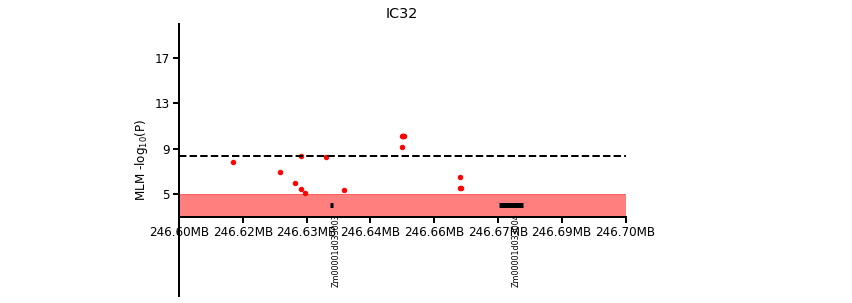

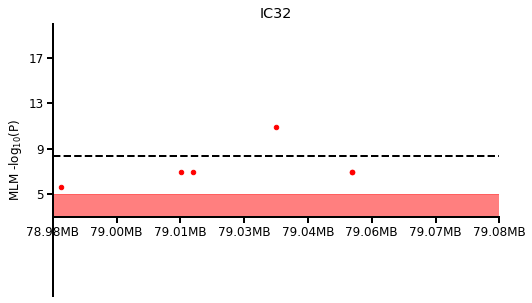

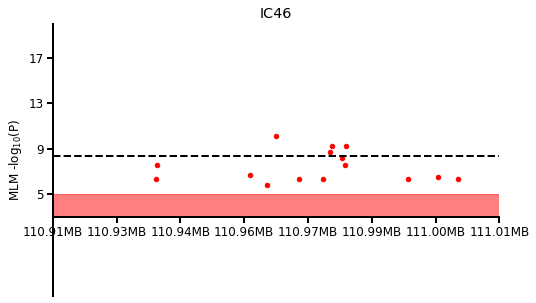

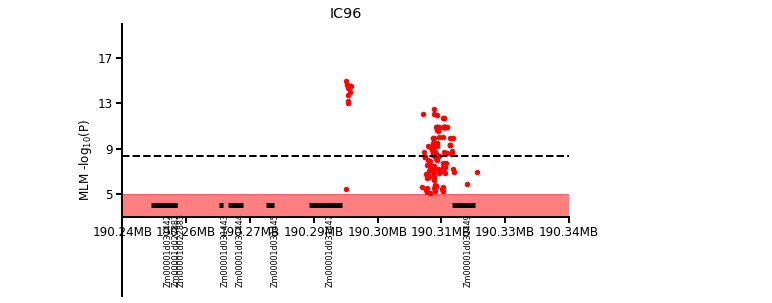

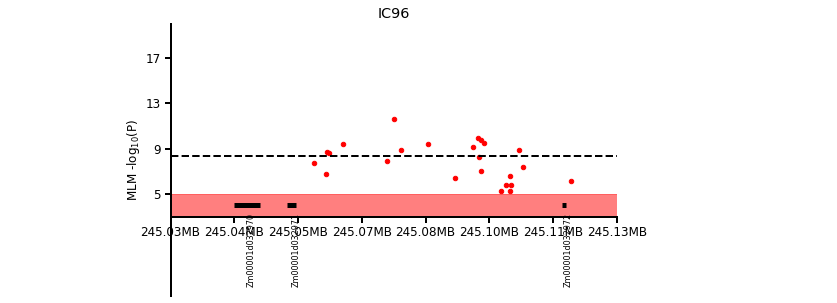

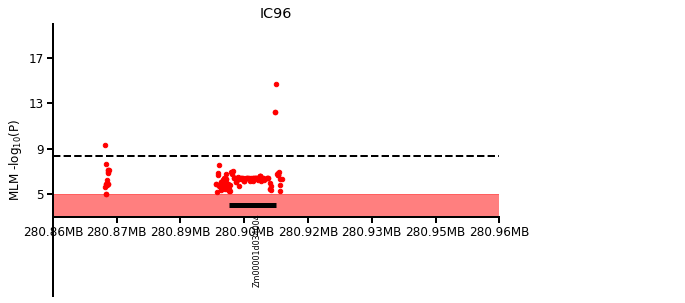

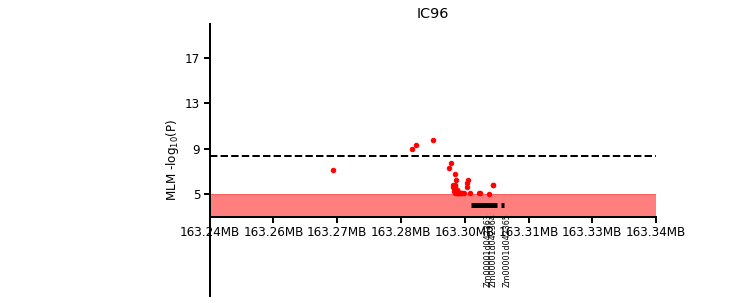

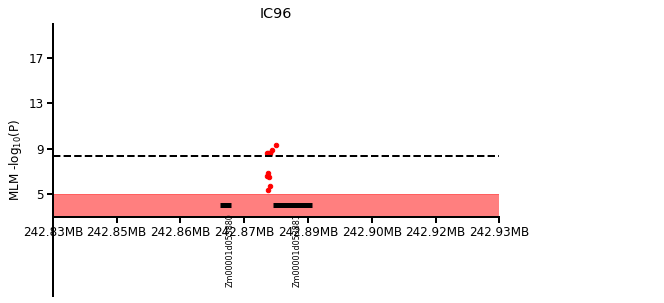

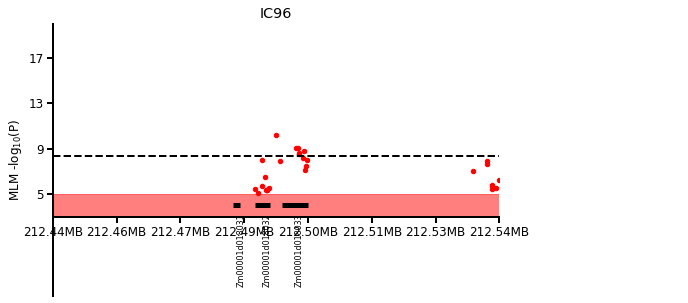

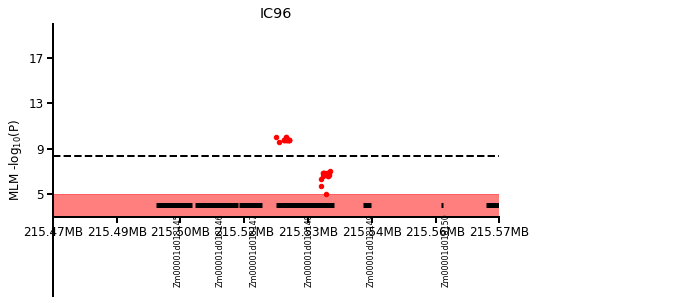

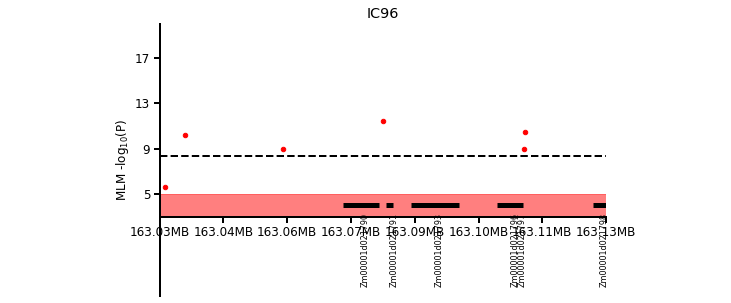

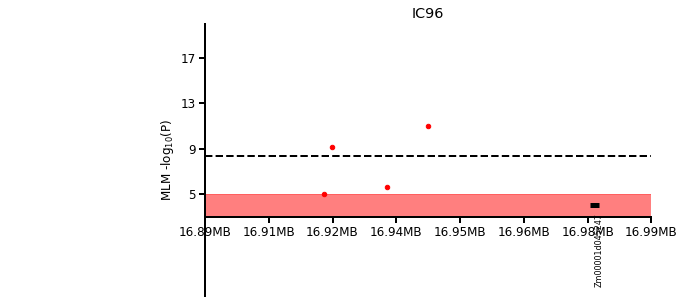

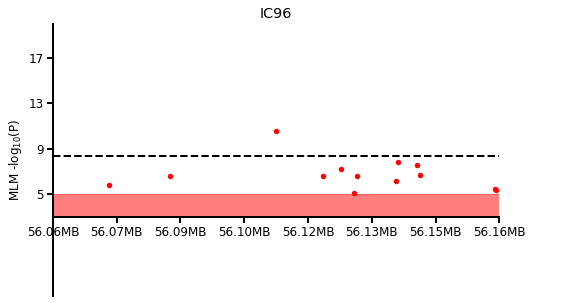

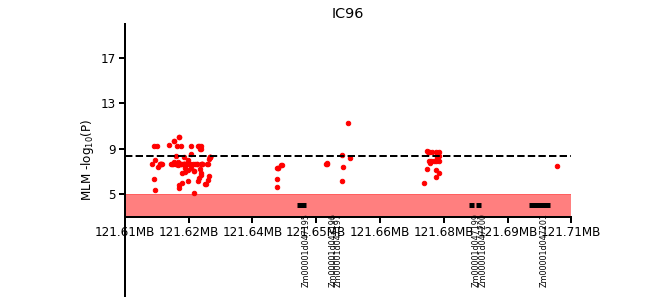

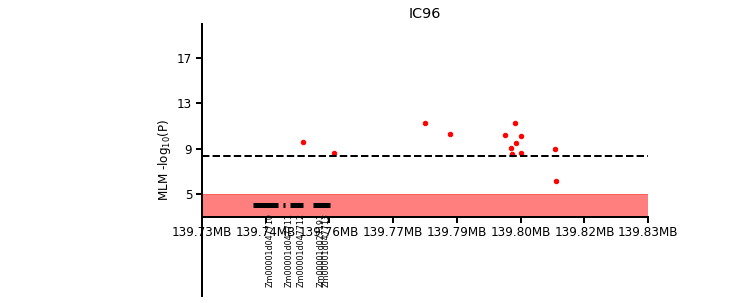

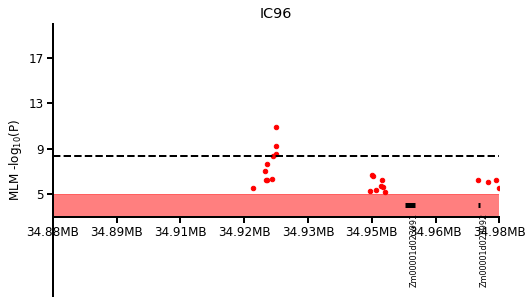

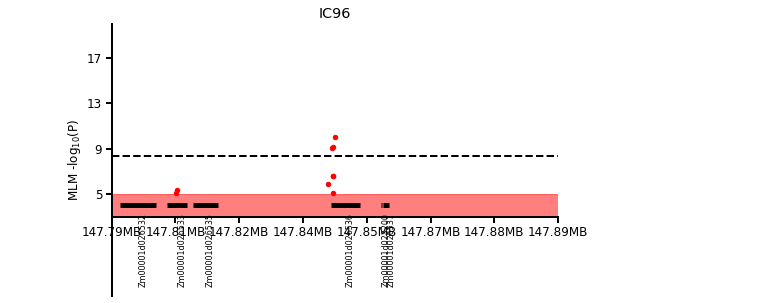

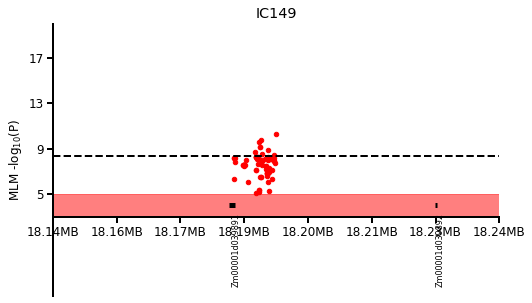

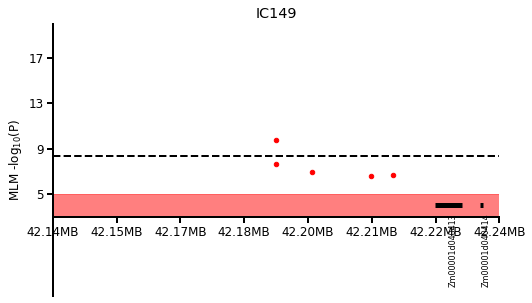

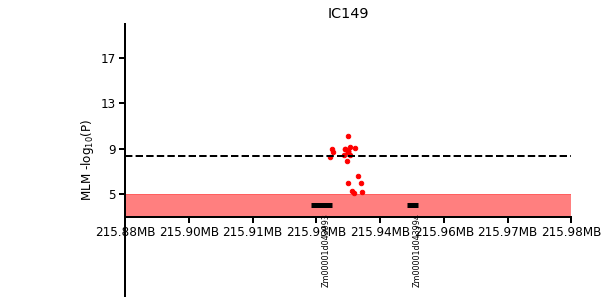

In [171]:
dfica = pd.read_csv('sigGWAS_RES/consolidatedPeaks_peaks.txt')
icList = ['IC32','IC46','IC96','IC149']
#dfica = pd.read_csv('consolidatedPeaks_peaks.txt')
dfica = dfica.loc[dfica['SnpNumer']>=3]
for ic in icList:
    dfic = dfica.loc[dfica['trait']==ic]
    dfassoc = pd.read_csv('sigGWAS_RES/{0}_transformed.assoc.txt'.format(ic.replace('IC','V')), sep = '\t', usecols = ['chr','ps','p_lrt'])
    #for x in dfic.index:
    #    pchr = dfic.loc[x]['chr']
    #    pst = dfic.loc[x]['ps'] - 50000
    #    ped = dfic.loc[x]['ps'] + 50000
    #    fout = 'ICA_Peak/'+ ic + '_' + str(pchr) + ':' + str(pst) + ':' + str(ped) + '_assoc.txt'
    #    dfassoc.loc[(dfassoc['chr'] == pchr)&(dfassoc['ps']>=pst)&(dfassoc['ps']<=ped), ['chr','ps','p_lrt']].to_csv(fout, sep = '\t', index = False)
    zoomInManhattan(dffunc, dfic, dfassoc, ic)

In [58]:
-np.log10(0.05/12191985)

8.387104415340179

In [24]:
ica_model_gene = []
for x in dfica.index:
    ic = dfica.loc[x]['PC']
    pSchr = dfica.loc[x]['chr']
    pSps = dfica.loc[x]['ps']
    dfePos = dfeSum.loc[(dfeSum.Type == 'Cis')&(dfeSum.chr == pSchr)]
    dfePos = dfePos.loc[dfePos['pStart'] <= pSps]
    dfePos = dfePos.loc[dfePos['pStop'] >= pSps]
    if not len(dfePos) == 0:
        for agene in dfePos.gene:
            if not agene in dffunc.index: continue
            ica_model_gene.append(agene)
            print(','.join([ic, agene, dffunc.loc[agene]['Function']]))

V81,Zm00001d030062,Plant intracellular Ras-group-related LRR protein 4
V81,Zm00001d030074, fbn1;fibrillin1: leaf cDNA csu653, moderate copy number, similar to plastid protein
V81,Zm00001d030053,AT-hook motif nuclear-localized protein 13
V98,Zm00001d032096,AT-rich interactive domain-containing protein 4
V98,Zm00001d032099,sec34-like family protein
V98,Zm00001d032098,DUF581 family protein
V75,Zm00001d032990, sdg123;SET domain protein123: histone methylation; one of 3 with disrupted (S-ET) domains among 22 SET domain proteins
V75,Zm00001d032974,Probable prolyl 4-hydroxylase 12
V75,Zm00001d032972,Pathogenesis-related thaumatin superfamily protein
V72,Zm00001d002758,DeSI-like protein 
V98,Zm00001d039469,Regulatory protein NPR1
V1,Zm00001d041829, thi3;thiamine synthesis3: enzymatic function confirmed assay of recombinant protein (Rapala-Kozik et al 2007)
V1,Zm00001d041839,Dihydrolipoyllysine-residue acetyltransferase component 5 of pyruvate dehydrogenase complex chloroplastic
V1,Zm00001d0418

In [ ]:
#gene cluster 

In [11]:
dfexp = pd.read_csv('eGWAS340_repMerged_Untransformed_fpkm.csv', index_col = 0)
dfexp.head()

,195-2,30-1,211,221,N225-2,47-2,N111-1,N67,65-2,131,...,181,N158,N230-1,45,186,N153,N62,N209,78-1,N104-2
Genotype,,,,,,,,,,,,,,,,,,,,,
GRMZM5G807592,1.933630,2.694335,2.363913,4.122939,2.043112,0.341037,2.694794,1.605850,4.479933,1.621900,...,2.240121,2.744332,8.646295,2.933233,1.443085,2.115398,0.879934,1.644013,6.869179,9.854738
GRMZM5G862955,7.389245,4.268723,9.019724,2.287370,4.699400,2.428999,3.442921,3.403870,4.533682,2.354067,...,3.866104,5.295570,8.535629,13.692167,7.012969,3.501997,3.142561,3.619889,8.859564,6.311875
GRMZM5G876913,1.732861,5.457645,1.185070,7.771573,2.259740,3.948604,2.684811,16.551222,2.137775,2.042227,...,4.702033,1.100901,6.017433,10.939571,3.493340,3.519200,0.903321,2.081258,2.167643,7.664829
GRMZM5G881135,2.723395,6.572539,2.031940,9.189209,2.728661,4.170288,5.569496,18.515398,1.807040,2.449745,...,3.871834,1.558241,7.389358,7.575142,5.092012,6.375844,1.782147,1.786301,1.701105,9.995428
GRMZM5G892769,2.501911,3.484054,2.159673,3.089995,0.974065,2.497503,2.875151,1.399555,2.115976,1.826595,...,1.560517,2.298458,3.732515,2.852453,2.438391,1.909019,0.595264,1.638299,5.964262,1.714945


In [26]:
cGene = open('ICA_PC/PC1.list').readlines()[1:]
cGene = [agene.strip() for agene in cGene]
dfcGene = dfexp.loc[cGene]
rowMean = dfcGene.mean(axis=1)
rowSTD = dfcGene.std(axis=1)
dfcGene = dfcGene.subtract(rowMean, axis=0)
dfcGene = dfcGene.div(rowSTD, axis = 0)
#dfcGene = dfcGene/rowSTD #.subtract(rowMean, axis=0)
dfcGene


,195-2,30-1,211,221,N225-2,47-2,N111-1,N67,65-2,131,...,181,N158,N230-1,45,186,N153,N62,N209,78-1,N104-2
Genotype,,,,,,,,,,,,,,,,,,,,,
Zm00001d002736,-0.996980,0.383897,1.263217,1.097989,-1.024418,-0.385581,-0.520826,-0.350044,-0.710091,-0.160849,...,0.012125,0.021048,2.872636,-1.391742,-1.153538,2.807096,1.736941,-0.685139,0.650737,0.925297
Zm00001d003841,-0.783115,0.392665,0.895348,1.120720,-0.361638,-0.509874,-0.588259,-0.255658,-0.666392,-0.233874,...,-0.400059,-0.434893,1.692709,-0.846693,-0.761148,6.014062,0.568666,-0.718767,0.528428,-0.848011
Zm00001d012394,-0.767117,-0.846237,0.955869,5.003615,-1.103709,-0.994379,-0.538228,0.185409,0.703655,1.105238,...,-1.011766,0.405476,2.412185,-0.800597,-0.676118,6.062621,1.141431,-0.163024,1.426695,-0.647702
Zm00001d012785,0.443278,-1.034822,-0.383985,3.136470,-0.355525,1.384811,1.312661,1.144769,0.285186,0.104077,...,0.734713,-0.514116,-0.521735,-1.756102,0.363886,1.344132,-0.414064,1.371968,-0.354308,-1.061086
Zm00001d016714,-0.514057,-1.302536,1.142619,0.737309,0.263351,-0.190733,0.067185,-0.367957,0.069219,-1.269549,...,0.579001,-0.735614,2.858532,-1.293636,-0.584578,0.970727,2.022022,-0.174290,0.463660,-0.795677
Zm00001d017767,-1.538973,0.688385,1.684744,0.544025,0.019705,-1.378980,-1.149443,-0.391732,-0.470565,0.368971,...,0.238756,0.578941,1.789100,-1.981916,-1.083605,1.010138,0.844853,-1.069151,1.915952,1.242023
Zm00001d018488,-0.786765,-0.587842,0.845704,1.891256,-1.016908,-0.492026,-0.956718,-0.696380,0.153615,-0.398925,...,0.372981,-0.404297,3.263224,-0.773298,-0.484638,4.307376,1.389093,-0.451382,0.778028,0.352681
Zm00001d019124,-2.009765,0.462980,0.997031,2.020098,-1.314819,-1.229480,0.149283,-0.042207,0.040697,0.695078,...,-0.351634,0.859298,4.567954,-1.910675,0.324134,1.628974,1.371905,-1.055823,-0.221591,-0.205910
Zm00001d019895,-1.643569,1.591052,0.085134,0.974259,-0.558376,-1.406315,-0.380788,0.960299,-0.562859,0.922755,...,-0.960709,0.797433,0.809374,-1.306673,-0.690152,1.862617,0.959181,-1.370513,1.468586,-0.691692


In [31]:
dfcGene.index

Index(['Zm00001d002736', 'Zm00001d003841', 'Zm00001d012394', 'Zm00001d012785',
       'Zm00001d016714', 'Zm00001d017767', 'Zm00001d018488', 'Zm00001d019124',
       'Zm00001d019895', 'Zm00001d020069', 'Zm00001d020707', 'Zm00001d020740',
       'Zm00001d020961', 'Zm00001d021214', 'Zm00001d023655', 'Zm00001d025703',
       'Zm00001d026677', 'Zm00001d027936', 'Zm00001d028419', 'Zm00001d029590',
       'Zm00001d029707', 'Zm00001d032035', 'Zm00001d035163', 'Zm00001d035962',
       'Zm00001d038609', 'Zm00001d039695', 'Zm00001d039697', 'Zm00001d039698',
       'Zm00001d043442', 'Zm00001d043598', 'Zm00001d044677', 'Zm00001d046491',
       'Zm00001d047830', 'Zm00001d049624', 'Zm00001d052932', 'Zm00001d052944',
       'Zm00001d053163'],
      dtype='object', name='Genotype')

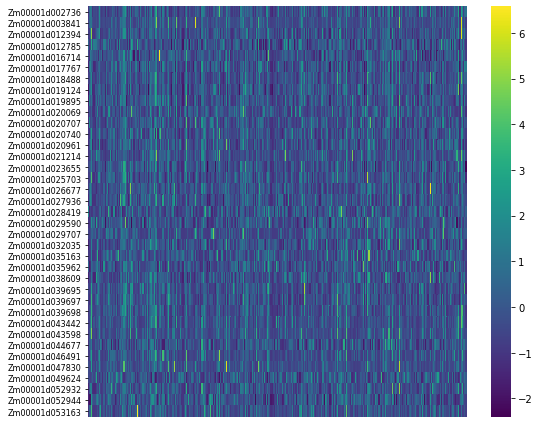

In [47]:
fig, ax = plt.subplots(figsize=(8,6), tight_layout = True)
sns.heatmap(dfcGene.values, cmap = 'viridis', cbar=True, yticklabels=list(dfcGene.index), xticklabels = '')
ax.set_yticklabels(list(dfcGene.index), fontsize =8) 
plt.savefig('IC1_Heatmap.png', dpi = 300)

In [48]:
dftas = 
for x in dftas.index:
    ic = dfica.loc[x]['PC']
    pSchr = dfica.loc[x]['chr']
    pSps = dfica.loc[x]['ps']
    dfePos = dfeSum.loc[(dfeSum.Type == 'Cis')&(dfeSum.chr == pSchr)]
    dfePos = dfePos.loc[dfePos['pStart'] <= pSps]
    dfePos = dfePos.loc[dfePos['pStop'] >= pSps]
    if not len(dfePos) == 0:
        for agene in dfePos.gene:
            if not agene in dffunc.index: continue
            print(ic, agene, dffunc.loc[agene]['Function'] )

NameError: name 'dftas' is not defined

In [50]:
dfmoduleGene = pd.read_csv('ModuleCandidatGene.csv')
dfmoduleGene

,Pattern,CandideCausalGene,Function,source
0,V1,Zm00001d041843,Amino acid permease 2,Nearby
1,V1,Zm00001d041842,Amino acid permease 2,Nearby
2,V1,Zm00001d025737,ZCN19,Nearby
3,V1,Zm00001d025735,Serine/threonine-protein kinase OXI1,Nearby
4,V1,Zm00001d025738,Sister chromatid cohesion 1 protein 2,Nearby
...,...,...,...,...
153,V104,Zm00001d047761,Two-component response regulator-like APRR3,eTrait
154,V104,Zm00001d047760,hydrolase family protein / HAD-superfamily pro...,eTrait
155,V104,Zm00001d047767,Expressed protein; protein,eTrait
156,V1,Zm00001d025724,Acid phosphatase/vanadium-dependent haloperoxi...,eTrait


In [51]:
dftas = pd.read_csv('TAS.csv')
#dftas = dftas.loc[dftas['SnpNumer']>=2]
dfgeneloc = pd.read_csv("gene_loc.map")
dfeSum = pd.read_csv('../HY_RES/cis_sqtl_eqtl/e340_eSummary_filt_withEQTL_Gene.csv')
dfsSum = pd.read_csv('../HY_RES/cis_sqtl_eqtl/sqtls_peak.csv')
dfsSum = dfsSum.loc[dfsSum['type']=='cis']
dfsSum = dfsSum.dropna()

TempRed = []
dfHb = pd.read_csv('../HY_RES/Figure1_data/Hb_Trop_VS_Temperate.csv', index_col = 0)
for agene in dfHb.index:
    if dfHb.loc[agene]['HbTemp']>= dfHb.loc[agene]['HbTrop']*0.8: TempRed.append(agene)

xpclr = pd.read_csv('../HY_RES/Selection/area_sel_genes.csv')
xpclr_gene = list(xpclr.gene_id.values)

for agene in dfHb.index:
    if dfHb.loc[agene]['HbTemp']< dfHb.loc[agene]['HbTrop']*0.8: TempRed.append(agene)

for x in dftas.index:
    trait = dftas.loc[x]['trait']
    mychr = dftas.loc[x]['chr']
    mypos = dftas.loc[x]['ps']
    myst = mypos - 1000000
    myed = mypos + 1000000
    
    dfgene = dfgeneloc.loc[dfgeneloc.chromosome == str(mychr)]
    dfgene = dfgene.loc[(dfgene.position_left >= myst)&(dfgene.position_right <= myed)]
    
    dfePos = dfeSum.loc[(dfeSum.Type == 'Cis')&(dfeSum.chr == mychr)]
    dfePos = dfePos.loc[dfePos['pStart'] <= mypos]
    dfePos = dfePos.loc[dfePos['pStop'] >= mypos]
    
    dfsPos = dfsSum.loc[dfsSum.chr == mychr]
    dfsPos = dfsPos.loc[(dfsPos['start'] <= mypos)&(dfsPos['end'] >= mypos)]
    
    
    if not len(dfgene) == 0:
        for agene in dfgene.gene.values:
            if agene in dfmoduleGene.CandideCausalGene.values: print(trait, agene, 'module!', dfmoduleeGene)
            if not agene in dffunc.index: continue
            func = dffunc.loc[agene]['Function']
            if agene in dfePos.gene.values and agene in xpclr_gene:
                if agene in TempRed: print('nearby', 'etrait', 'HbReduced', 'xpclr', trait, agene, func)   

Stewarts_Wilt Zm00001d032974 module!
Stewarts_Wilt Zm00001d032970 module!
Stewarts_Wilt Zm00001d032973 module!
Stewarts_Wilt Zm00001d032976 module!
Stewarts_Wilt Zm00001d032972 module!
Stewarts_Wilt Zm00001d032971 module!
Glume_Development Zm00001d002768 module!
Glume_Development Zm00001d002760 module!
Glume_Development Zm00001d002773 module!
Glume_Development Zm00001d002761 module!
Glume_Development Zm00001d002770 module!
Glume_Development Zm00001d002762 module!
Glume_Development Zm00001d002769 module!
Glume_Development Zm00001d002772 module!
nearby etrait HbReduced xpclr Glume_Development Zm00001d012064 Peptidyl-prolyl cis-trans isomerase  
nearby etrait HbReduced xpclr Endosperm_Color Zm00001d036345  y1;yellow endosperm1: reduced carotenoid pigments in endosperm; some alleles affect chlorophyll in seedlings (e.g. y1-8549, y1-pb)
nearby etrait HbReduced xpclr Peiffer_2014_GDD_DTA Zm00001d009365  sweet2;sugars will eventually be exported transporter2:


In [64]:
dfgff = pd.read_csv('ICA_Peak/Zmays_gene.gff3',sep = '\t', header = None)
dfgff[2] = 'CDS'
dfgff.to_csv('ICA_Peak/Zm.gff3', header =None, index = False, sep = '\t')

In [332]:
dftwas = pd.read_csv('TWAS_MARCIN.csv', index_col = 'gene')
for agene in dftwas.index:
    phenotype = dftwas.loc[agene]['phenotype']
    if agene in xpclr_gene and agene in TempRed and agene in dfeSum.gene.values:
        print(agene)

Zm00001d036345


In [352]:
dfmoduleGene = pd.read_csv('ModuleCandidatGene.csv')
dfmoduleGene.head()

,Pattern,CandideCausalGene,Function,source
0,V56,Zm00001d029619,UDP-glycosyltransferase 74B1,eTrait
1,V56,Zm00001d029620,UDP-glycosyltransferase 74B1,eTrait
2,V56,Zm00001d029628,psei7;cystatin7:,eTrait
3,V56,Zm00001d029840,Short-chain dehydrogenase TIC 32 chloroplastic,eTrait
4,V56,Zm00001d029861,Probable respiratory burst oxidase homolog pro...,eTrait


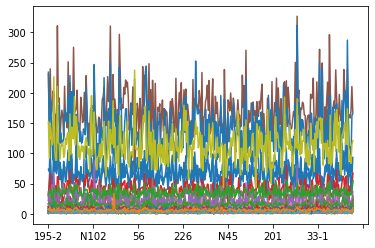

In [275]:
import seaborn as sns
fig, ax = plt.subplots()
for agene in dfcGene.index:
    ax = dfcGene.loc[agene].plot()

V56
V56
V96
V96
V89
V73
V58
V116
V71
V24


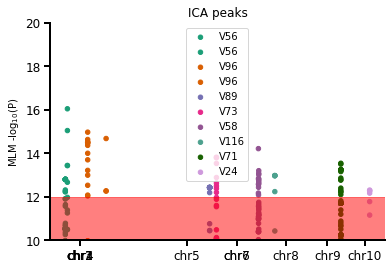

In [59]:
#mycolors = mpl.get_cmap('')list(np.tile(['Red','Green','Blue','Purple'],3))[:10]
from matplotlib.colors import hex2color
colors = ['#1b9e77', "#d95f02", '#7570b3', '#e7298a','#925492','#4da18e','#186100','#ce99dc','#d5bd3c']

#mycolors = [hex2color(colors[i]) for i in range(len(colors))] # Converting from HEX into RGB
uniquePC = list(dfica.PC.unique())
mycolors = colors[:len(uniquePC)]

cDict = dict(zip(uniquePC,mycolors))
pDict = {}

fig, ax = plt.subplots()
ax.set_ylim(10,20)
#ax.set_xlim(0,10)
ax.axhline(y=0)
ax.axhline(y=8)
ax.axhspan(0,12,0,12, alpha=0.5, color = 'red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12,direction='out', length=6, width=2)
plt.setp(ax.spines.values(), linewidth=2)
#ax.set_ylim(1,15)
ax.set_ylabel('MLM -log$_{10}$(P)')
xticks = []
xticklabels = ['chr{0}'.format(str(i)) for i in range(1,11)]
for x in dfica.index:
    IC = dfica.loc[x]['PC']
    print(IC)
    mychr = dfica.loc[x]['chr']
    st = dfica.loc[x]['pStart']
    ed = dfica.loc[x]['pStop']    
    assocFile = 'sigGWAS_RES/' + IC + '_transformed_signal.csv'
    dfassoc = pd.read_csv(assocFile)
    dfassoc = dfassoc.loc[dfassoc['chr'] == mychr]
    dfassoc = dfassoc.loc[(dfassoc['ps']>=st) & (dfassoc['ps']<=ed)]
    
    
    dfassoc['myColor'] = cDict[IC]
    addition = dfchr.loc[mychr]['addition']
    midPos = dfchr.loc[mychr]['addition'] + dfchr.loc[mychr]['Length']/2 
    dfassoc['myPos'] = dfassoc['ps'] + addition
    ax.scatter(dfassoc['myPos'], dfassoc['logPvalue'], color = dfassoc['myColor'],  rasterized=True, s=20, label = IC)
    #midPos = (dfassoc['myPos'].max() - dfassoc['myPos'].min())/2 + dfassoc['myPos'].min()
    xticks.append(midPos)
ax.set_title('ICA peaks')
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.legend()


In [57]:
dfchr

,Length,addition,color
Chr,,,
1,307041717,0,grey
2,244442276,312041717,grey
3,235667834,561483993,grey
4,246994605,802151827,grey
5,223902240,1054146432,grey
6,174033170,1283048672,grey
7,182381542,1462081842,grey
8,181122637,1649463384,grey
9,159769782,1835586021,grey


In [37]:
grp

,Unnamed: 0,chr,rs,ps,p_lrt,logPvalue,myColor,myPos
119,10472584,9,9-20388311,20157611,6.832078e-10,9.165447,#186100,1855743632


(0.10588235294117647, 0.6196078431372549, 0.4666666666666667)

In [8]:
import re
L = 'AAGCGGGGCACCCGAGAAAAATCTCCGGTCGGTCACCCATCCTAAGATTGCTCTGAACCAAGCATGCTTAACCTTTCGAGACAGGATTCCGAAAAAAAAGATACACCTTGTTGGTACGAGTACTTTATTAATTTTATTAAGTCTTGGGCTA'
re.split(r'(A|G|T)GC(A|C|T)C',L, maxsplit=1)

['AAGCGG',
 'G',
 'A',
 'CCGAGAAAAATCTCCGGTCGGTCACCCATCCTAAGATTGCTCTGAACCAAGCATGCTTAACCTTTCGAGACAGGATTCCGAAAAAAAAGATACACCTTGTTGGTACGAGTACTTTATTAATTTTATTAAGTCTTGGGCTA']

In [7]:
r'(A|G|T)GC(A|C|T)C'

'(A|G|T)GC(A|C|T)C'

(<matplotlib.axes._subplots.AxesSubplot at 0x7f2462c410a0>,
 ({GF(Small feature, 0-20 (1)): 0,
   GF(Gene 1 with a very long name, 20-500 (1)): 0,
   GF(Gene 2, 400-700 (-1)): 1.0,
   GF(Gene 3, 600-900 (1)): 0},
  {GF(Small feature, 0-20 (1)): {'feature_y': 0, 'annotation_y': 1.0}}))

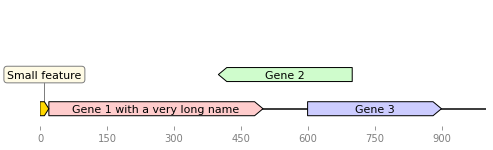

In [88]:
from dna_features_viewer import GraphicFeature, GraphicRecord
features=[
    GraphicFeature(start=0, end=20, strand=+1, color="#ffd700",
                   label="Small feature"),
    GraphicFeature(start=20, end=500, strand=+1, color="#ffcccc",
                   label="Gene 1 with a very long name"),
    GraphicFeature(start=400, end=700, strand=-1, color="#cffccc",
                   label="Gene 2"),
    GraphicFeature(start=600, end=900, strand=+1, color="#ccccff",
                   label="Gene 3")
]
record = GraphicRecord(sequence_length=1000, features=features)
record.plot()


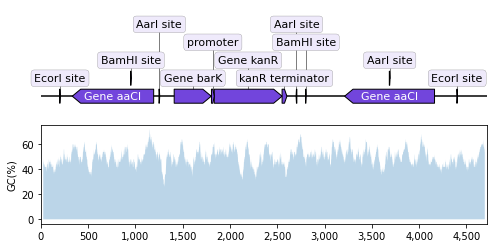

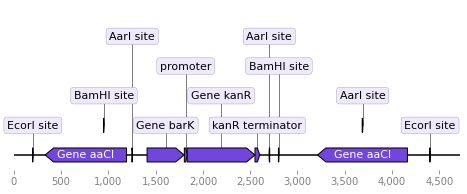

In [90]:
import matplotlib.pyplot as plt
from dna_features_viewer import BiopythonTranslator
from Bio import SeqIO
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4), sharex=True)

# Parse the genbank file, plot annotations
record = SeqIO.read("DnaFeaturesViewer/examples/example_sequence.gb", "genbank")
graphic_record = BiopythonTranslator().translate_record(record)
ax, levels = graphic_record.plot()
graphic_record.plot(ax=ax1, with_ruler=False)

# Plot the local GC content
def plot_local_gc_content(record, window_size, ax):
    gc_content = lambda s: 100.0*len([c for c in s if c in "GC"]) / len(s)
    yy = [gc_content(record.seq[i:i+window_size])
          for i in range(len(record.seq)-window_size)]
    xx = np.arange(len(record.seq)-window_size)+25
    ax.fill_between(xx, yy, alpha=0.3)
    ax.set_ylabel("GC(%)")

plot_local_gc_content(record, window_size=50, ax=ax2)

# Resize the figure
fig.savefig("with_plot.png")

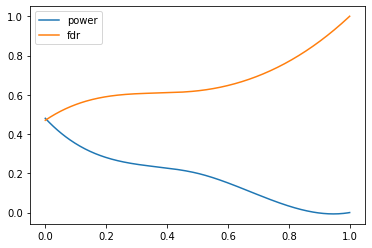

In [200]:
import scipy
from scipy.interpolate import make_interp_spline, BSpline
y1 = [0.48,0.26,0.20,0.06,0]
y1.sort()
y2 = [0.60,0.47,0.62,0.73,1]
y2.sort()
x = np.linspace(0,1,len(y1))
x_new = np.linspace(0,1,300)
sp1 = make_interp_spline(x, y1,k=3)
sp2 = make_interp_spline(x, y2,k=3)
y1_smooth = list(sp1(x_new))
y1_smooth.reverse()
y2_smooth = list(sp2(x_new))
plt.plot(x_new, y1_smooth, label = 'power')
plt.plot(x_new, y2_smooth, label = 'fdr')
plt.legend()


In [367]:
dfnut = pd.read_csv('21-146-7080.csv', index_col = 0)
dfnut.head()

,Species,N,S,P,K,Mg,Ca,Na,Fe,Mn,Cu,Zn,B,Condition,Treatment
SampleID,,,,,,,,,,,,,,,
S1,CORN,1.66,0.36,0.22,4.60,0.55,0.34,0.038,292,74,48,11,15,Full,Ctl
S2,CORN,1.79,0.32,0.21,4.72,0.47,0.29,0.041,146,66,44,10,12,Full,Ctl
S3,CORN,1.93,0.45,0.22,4.18,0.66,0.44,0.038,469,89,53,12,16,Full,Ctl
S4,SORGHUM,1.90,0.22,0.27,3.90,0.50,0.33,0.012,88,110,96,17,14,Full,Ctl
S5,SORGHUM,2.01,0.21,0.26,3.72,0.53,0.35,0.011,109,117,94,17,15,Full,Ctl


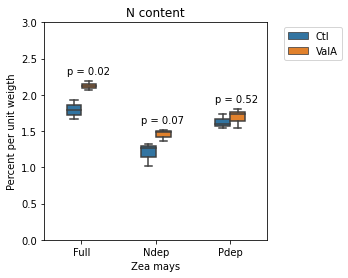

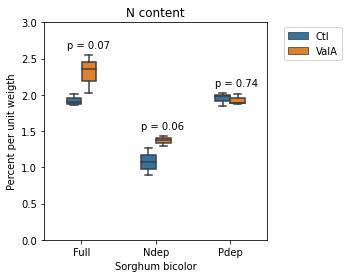

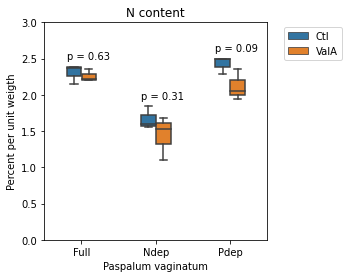

In [447]:
sDict = {'CORN':'Zea mays','SORGHUM':'Sorghum bicolor','GRASS':'Paspalum vaginatum'}
for aspecies in ['CORN', 'SORGHUM', 'GRASS']:
    xlab = sDict[aspecies]
    dfplot = dfnut.loc[dfnut['Species'] == aspecies]
    dfplot = dfplot[['Species','N','Condition','Treatment']]
    dfplot = dfplot.melt(id_vars=('Condition','Species','Treatment'))
    
    tDict = {}
    xDict = {'Full':-0.2, 'Ndep': 0.8, 'Pdep':1.8}
    
    for condition in ['Full','Ndep','Pdep']:
        ctrl = dfplot.loc[(dfplot['Condition']==condition)&(dfplot['Treatment']=='Ctl')]['value']
        ValA = dfplot.loc[(dfplot['Condition']==condition)&(dfplot['Treatment']=='ValA')]['value']
        stat, pval = scipy.stats.ttest_ind(ctrl, ValA)
        tDict[condition] = str(round(pval,2))

    fig, ax = plt.subplots(figsize=(4,4))
    sns.boxplot(x = 'Condition', y = 'value', hue = 'Treatment', width = 0.4, data = dfplot, ax = ax)
    ax.set_title('N content')
    ax.set_ylabel('Percent per unit weigth')
    ax.set_xlabel(xlab)
    ax.set_ylim(0,3)
    
    for condition, grp in dfplot.groupby('Condition'):
        xpos = xDict[condition]
        ypos = grp['value'].max() + 0.1
        pval = tDict[condition]
        ax.annotate( 'p = ' + pval, (xpos,ypos))
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left' )

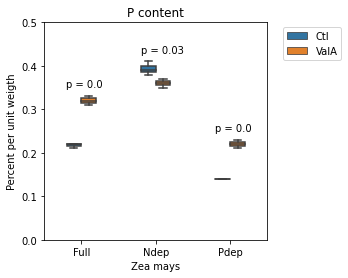

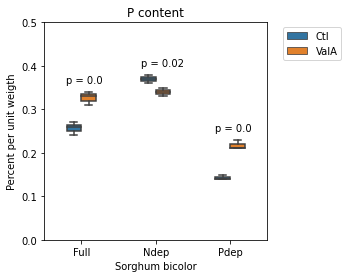

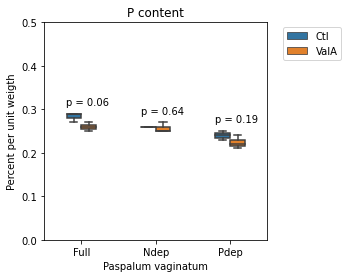

In [454]:
sDict = {'CORN':'Zea mays','SORGHUM':'Sorghum bicolor','GRASS':'Paspalum vaginatum'}
for aspecies in ['CORN', 'SORGHUM', 'GRASS']:
    xlab = sDict[aspecies]
    dfplot = dfnut.loc[dfnut['Species'] == aspecies]
    dfplot = dfplot[['Species','P','Condition','Treatment']]
    dfplot = dfplot.melt(id_vars=('Condition','Species','Treatment'))
    
    tDict = {}
    xDict = {'Full':-0.2, 'Ndep': 0.8, 'Pdep':1.8}
    
    for condition in ['Full','Ndep','Pdep']:
        ctrl = dfplot.loc[(dfplot['Condition']==condition)&(dfplot['Treatment']=='Ctl')]['value']
        ValA = dfplot.loc[(dfplot['Condition']==condition)&(dfplot['Treatment']=='ValA')]['value']
        stat, pval = scipy.stats.ttest_ind(ctrl, ValA)
        tDict[condition] = str(round(pval,2))

    fig, ax = plt.subplots(figsize=(4,4))
    sns.boxplot(x = 'Condition', y = 'value', hue = 'Treatment', width = 0.4, data = dfplot, ax = ax)
    ax.set_title('P content')
    ax.set_ylabel('Percent per unit weigth')
    ax.set_xlabel(xlab)
    ax.set_ylim(0,0.5)
    
    for condition, grp in dfplot.groupby('Condition'):
        xpos = xDict[condition]
        ypos = grp['value'].max() + 0.02
        pval = tDict[condition]
        ax.annotate( 'p = ' + pval, (xpos,ypos))
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left' )

In [390]:
F_P = dfplot.loc[(dfplot['Condition']=='Full')&(dfplot['Treatment']=='Ctl')]['value']
Fv_P = dfplot.loc[(dfplot['Condition']=='Full')&(dfplot['Treatment']=='ValA')]['value']
stat, pval = scipy.stats.ttest_ind(F_P, Fv_P)

Ttest_indResult(statistic=-15.499999999999984, pvalue=0.00010112729322950563)

In [461]:
dfpas = dfnut.loc[dfnut['Species']=='GRASS']
dfpas = dfpas.loc[dfpas['Treatment'] == 'Ctl']
dfpas = dfpas[['N','P','Condition']]
#dfpas = dfpas.melt(id_vars='Condition')
dfpas

,N,P,Condition
SampleID,,,
S7,2.37,0.29,Full
S8,2.15,0.27,Full
S9,2.39,0.29,Full
S16,1.60,0.26,Ndep
S17,1.84,0.26,Ndep
S18,1.55,0.26,Ndep
S25,2.49,0.25,Pdep
S26,2.29,0.23,Pdep
S27,2.50,0.24,Pdep


Text(0, 0.5, 'P percentage per dry weight')

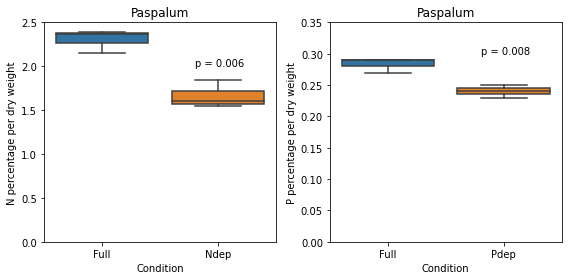

In [502]:
dfpasN = dfpas[['N','Condition']].loc[dfpas.Condition != 'Pdep']
dfpasP = dfpas[['P','Condition']].loc[dfpas.Condition != 'Ndep']
fig, axes = plt.subplots(1,2, figsize=(8,4), tight_layout = True)
sns.boxplot(x='Condition', y = 'N', data = dfpasN, ax = axes[0])
sns.boxplot(x='Condition', y = 'P', data = dfpasP, ax = axes[1])
axes[0].set_ylim(0,2.5)
axes[1].set_ylim(0,0.35)
axes[0].annotate('p = 0.006',(0.8,2) )
axes[1].annotate('p = 0.008',(0.8,0.3))
axes[0].set_title('Paspalum')
axes[1].set_title('Paspalum')
axes[0].set_ylabel('N percentage per dry weight')
axes[1].set_ylabel('P percentage per dry weight')

In [488]:
scipy.stats.ttest_ind(dfpasN['N'].values[:3],dfpasN['N'].values[3:])

Ttest_indResult(statistic=5.424075090059293, pvalue=0.005601842153656781)

In [489]:
scipy.stats.ttest_ind(dfpasP['P'].values[:3],dfpasP['P'].values[3:])

Ttest_indResult(statistic=4.913538149119967, pvalue=0.0079662024526083)

In [438]:
dfnut.Species.unique()

array(['CORN', 'SORGHUM', 'GRASS'], dtype=object)

Full: 0.0
Ndep: 0.034
Pdep: 0.0
Full: 0.005
Ndep: 0.021
Pdep: 0.001
Full: 0.057
Ndep: 0.643
Pdep: 0.189


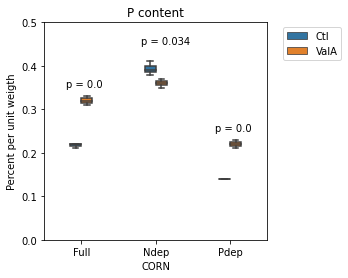

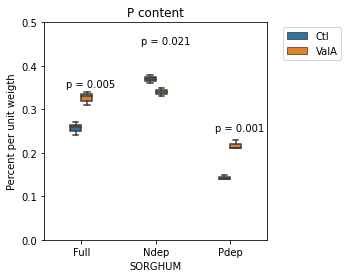

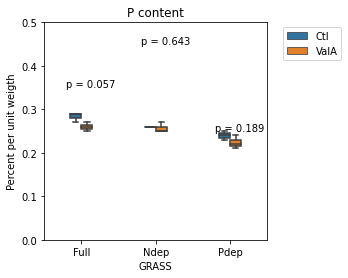

In [439]:
for aspecies in ['CORN', 'SORGHUM', 'GRASS']:    
    dfplot = dfnut.loc[dfnut['Species'] == aspecies]
    dfplot = dfplot[['Species','P','Condition','Treatment']]
    dfplot = dfplot.melt(id_vars=('Condition','Species','Treatment'))
    F = dfplot.loc[(dfplot['Condition']=='Full')&(dfplot['Treatment']=='Ctl')]['value']
    FV = dfplot.loc[(dfplot['Condition']=='Full')&(dfplot['Treatment']=='ValA')]['value']
    N = dfplot.loc[(dfplot['Condition']=='Ndep')&(dfplot['Treatment']=='Ctl')]['value']
    NV = dfplot.loc[(dfplot['Condition']=='Ndep')&(dfplot['Treatment']=='ValA')]['value']
    P = dfplot.loc[(dfplot['Condition']=='Pdep')&(dfplot['Treatment']=='Ctl')]['value']
    PV= dfplot.loc[(dfplot['Condition']=='Pdep')&(dfplot['Treatment']=='ValA')]['value']
    stat, pval_F = scipy.stats.ttest_ind(F, FV)
    stat, pval_N = scipy.stats.ttest_ind(N, NV)
    stat, pval_P = scipy.stats.ttest_ind(P, PV)

    pval_F = round(pval_F,3)
    pval_N = round(pval_N,3)
    pval_P = round(pval_P,3)

    print('Full:', pval_F)
    print('Ndep:', pval_N)
    print('Pdep:', pval_P)


    fig, ax = plt.subplots(figsize=(4,4))
    sns.boxplot(x = 'Condition', y = 'value', hue = 'Treatment', width = 0.3, data = dfplot, ax = ax)
    ax.set_title('P content')
    ax.set_ylabel('Percent per unit weigth')
    ax.set_xlabel(aspecies)
    ax.set_ylim(0,0.5)
    ax.annotate( 'p = ' + str(pval_F), (-0.2,0.35))
    ax.annotate( 'p = ' + str(pval_N), (0.8,0.45))
    ax.annotate( 'p = ' + str(pval_P), (1.8,0.25))
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left' )